# PySpider : A Powerful Spider(Web Crawler)  Framework in Python
# 1. Introduction

PySpider is a web crawler system that can run python scripts. It provides you with easy to use UI where you can edit your scripts, monitor ongoing tasks and view results. 

Comparing with other web crawler framework, the motivation to apply pyspider is as follows:
1. **Easier to debug**: It has a UI for you to know which part goes wrong
2. **Inbuilt dashboard**: Easier for monitoring the process
3. **Compatible to Javascript**:  Unlike Scrapy, you need to install scrapy-splash to render the javascript website, but Pyspider provides Puppeteer, which is a very famous and powerful library developed by Google in Javascript for web crawling.
4. **Database support**: Able to save results to database directly, such as MySQL, MongoDB, and PostgreSQL
5. **Scalabe**: Use a distributed architecture
6. **Prioritization and efficient**: Every task can be prioritized and results are cached with age to prevent extra work


In your shell, run:

In [ ]:
pip install pyspider
pyspider

then visit http://localhost:5000/, there you can find the webUI of PySpider

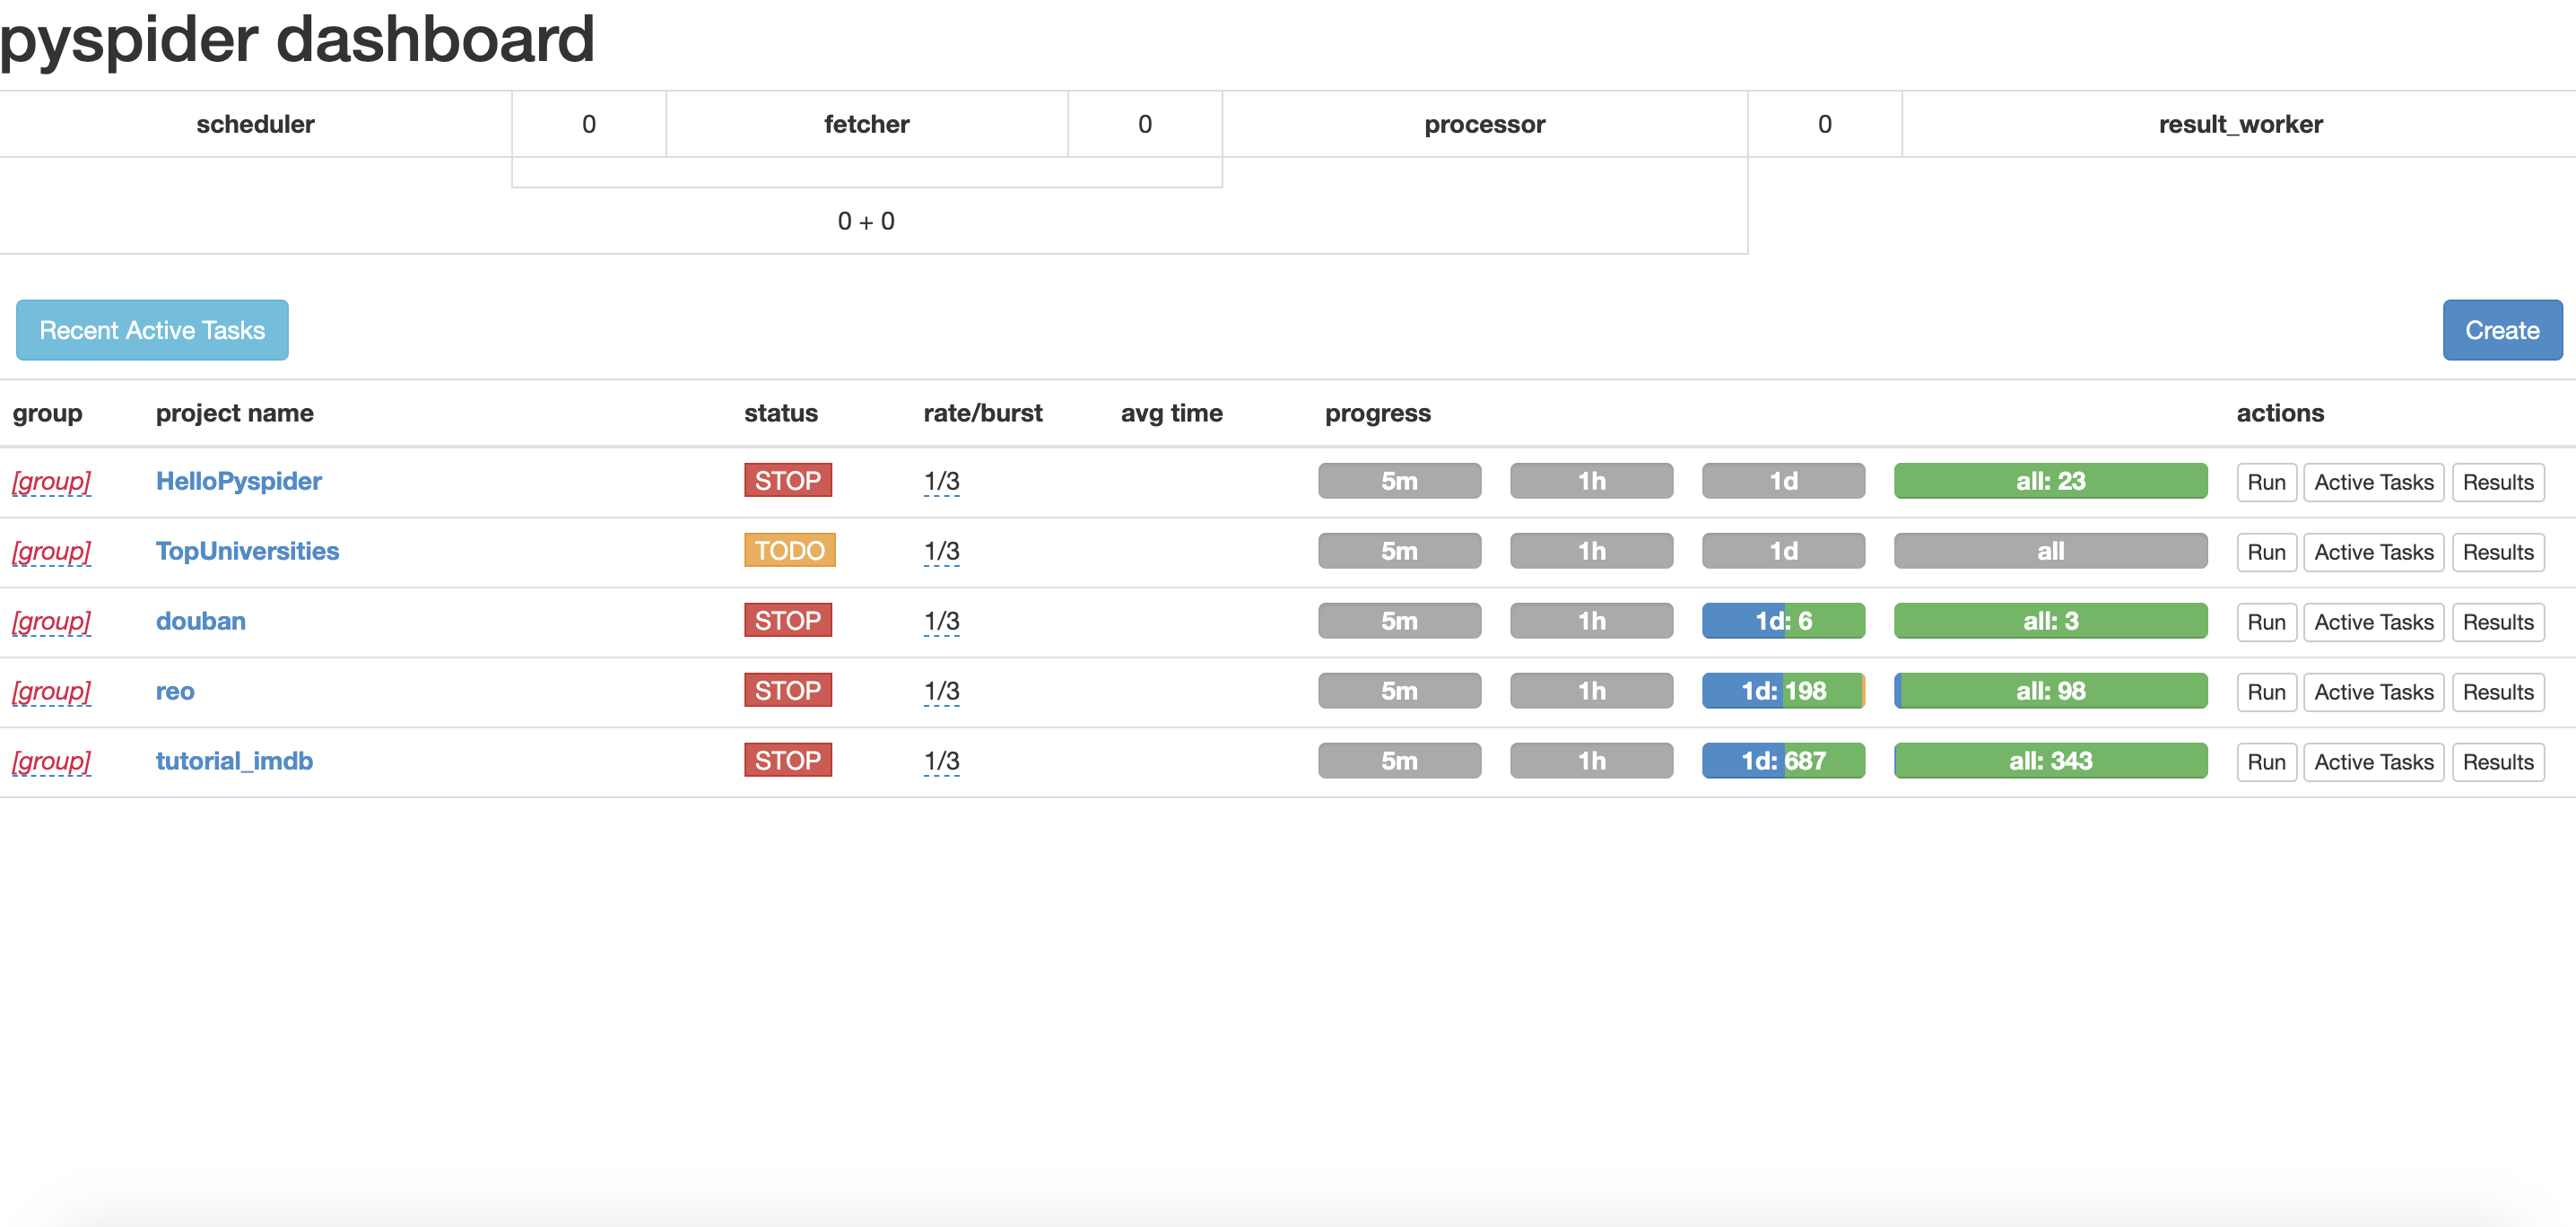

In [2]:
from IPython.display import Image
Image("img/1.png")

# 2. Basic Usage

Say, we would like to get some data from the top 100 US universities, such as their websites, tuition fees, total students, falcuty staff numbers and etc. Firstly, let's start with this website: https://www.topuniversities.com/where-to-study/north-america/united-states/ranked-top-100-us-universities
We want to scrape the data on this page. 
In our last Step, we open the webUI, now click ***Create***, then:
<br>Project Name: The name of this task(project)
<br>Start URL: The URL where our crawler starts to scrape, here it's the url above

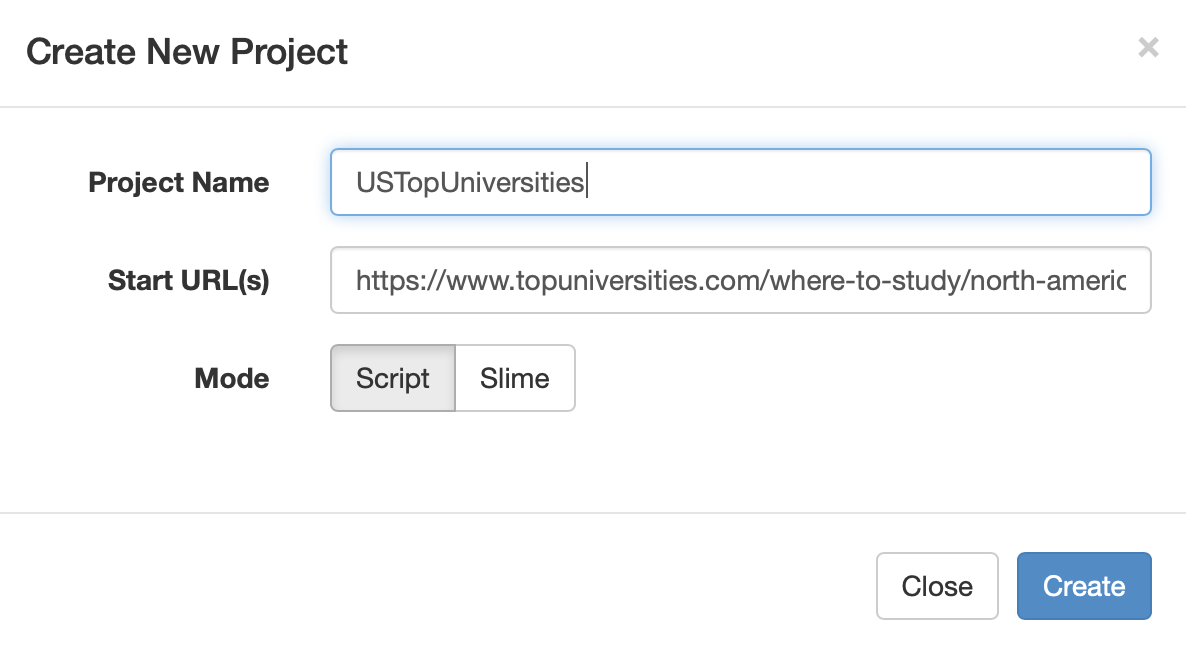

In [10]:
Image("img/2.png", width = 600, height = 200)

After you click Create, it will bring you to a new page, on the right, it will display the initial default code for this project:

In [15]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
# Created on 2020-03-25 00:33:22
# Project: USTopUniversities

from pyspider.libs.base_handler import *

class Handler(BaseHandler):
    crawl_config = {
    }

    @every(minutes=24 * 60)
    def on_start(self):
        self.crawl('https://www.topuniversities.com/where-to-study/north-america/united-states/ranked-top-100-us-universities', callback=self.index_page)

    @config(age=10 * 24 * 60 * 60)
    def index_page(self, response):
        for each in response.doc('a[href^="http"]').items():
            self.crawl(each.attr.href, callback=self.detail_page)

    @config(priority=2)
    def detail_page(self, response):
        return {
            "url": response.url,
            "title": response.doc('title').text(),
        }

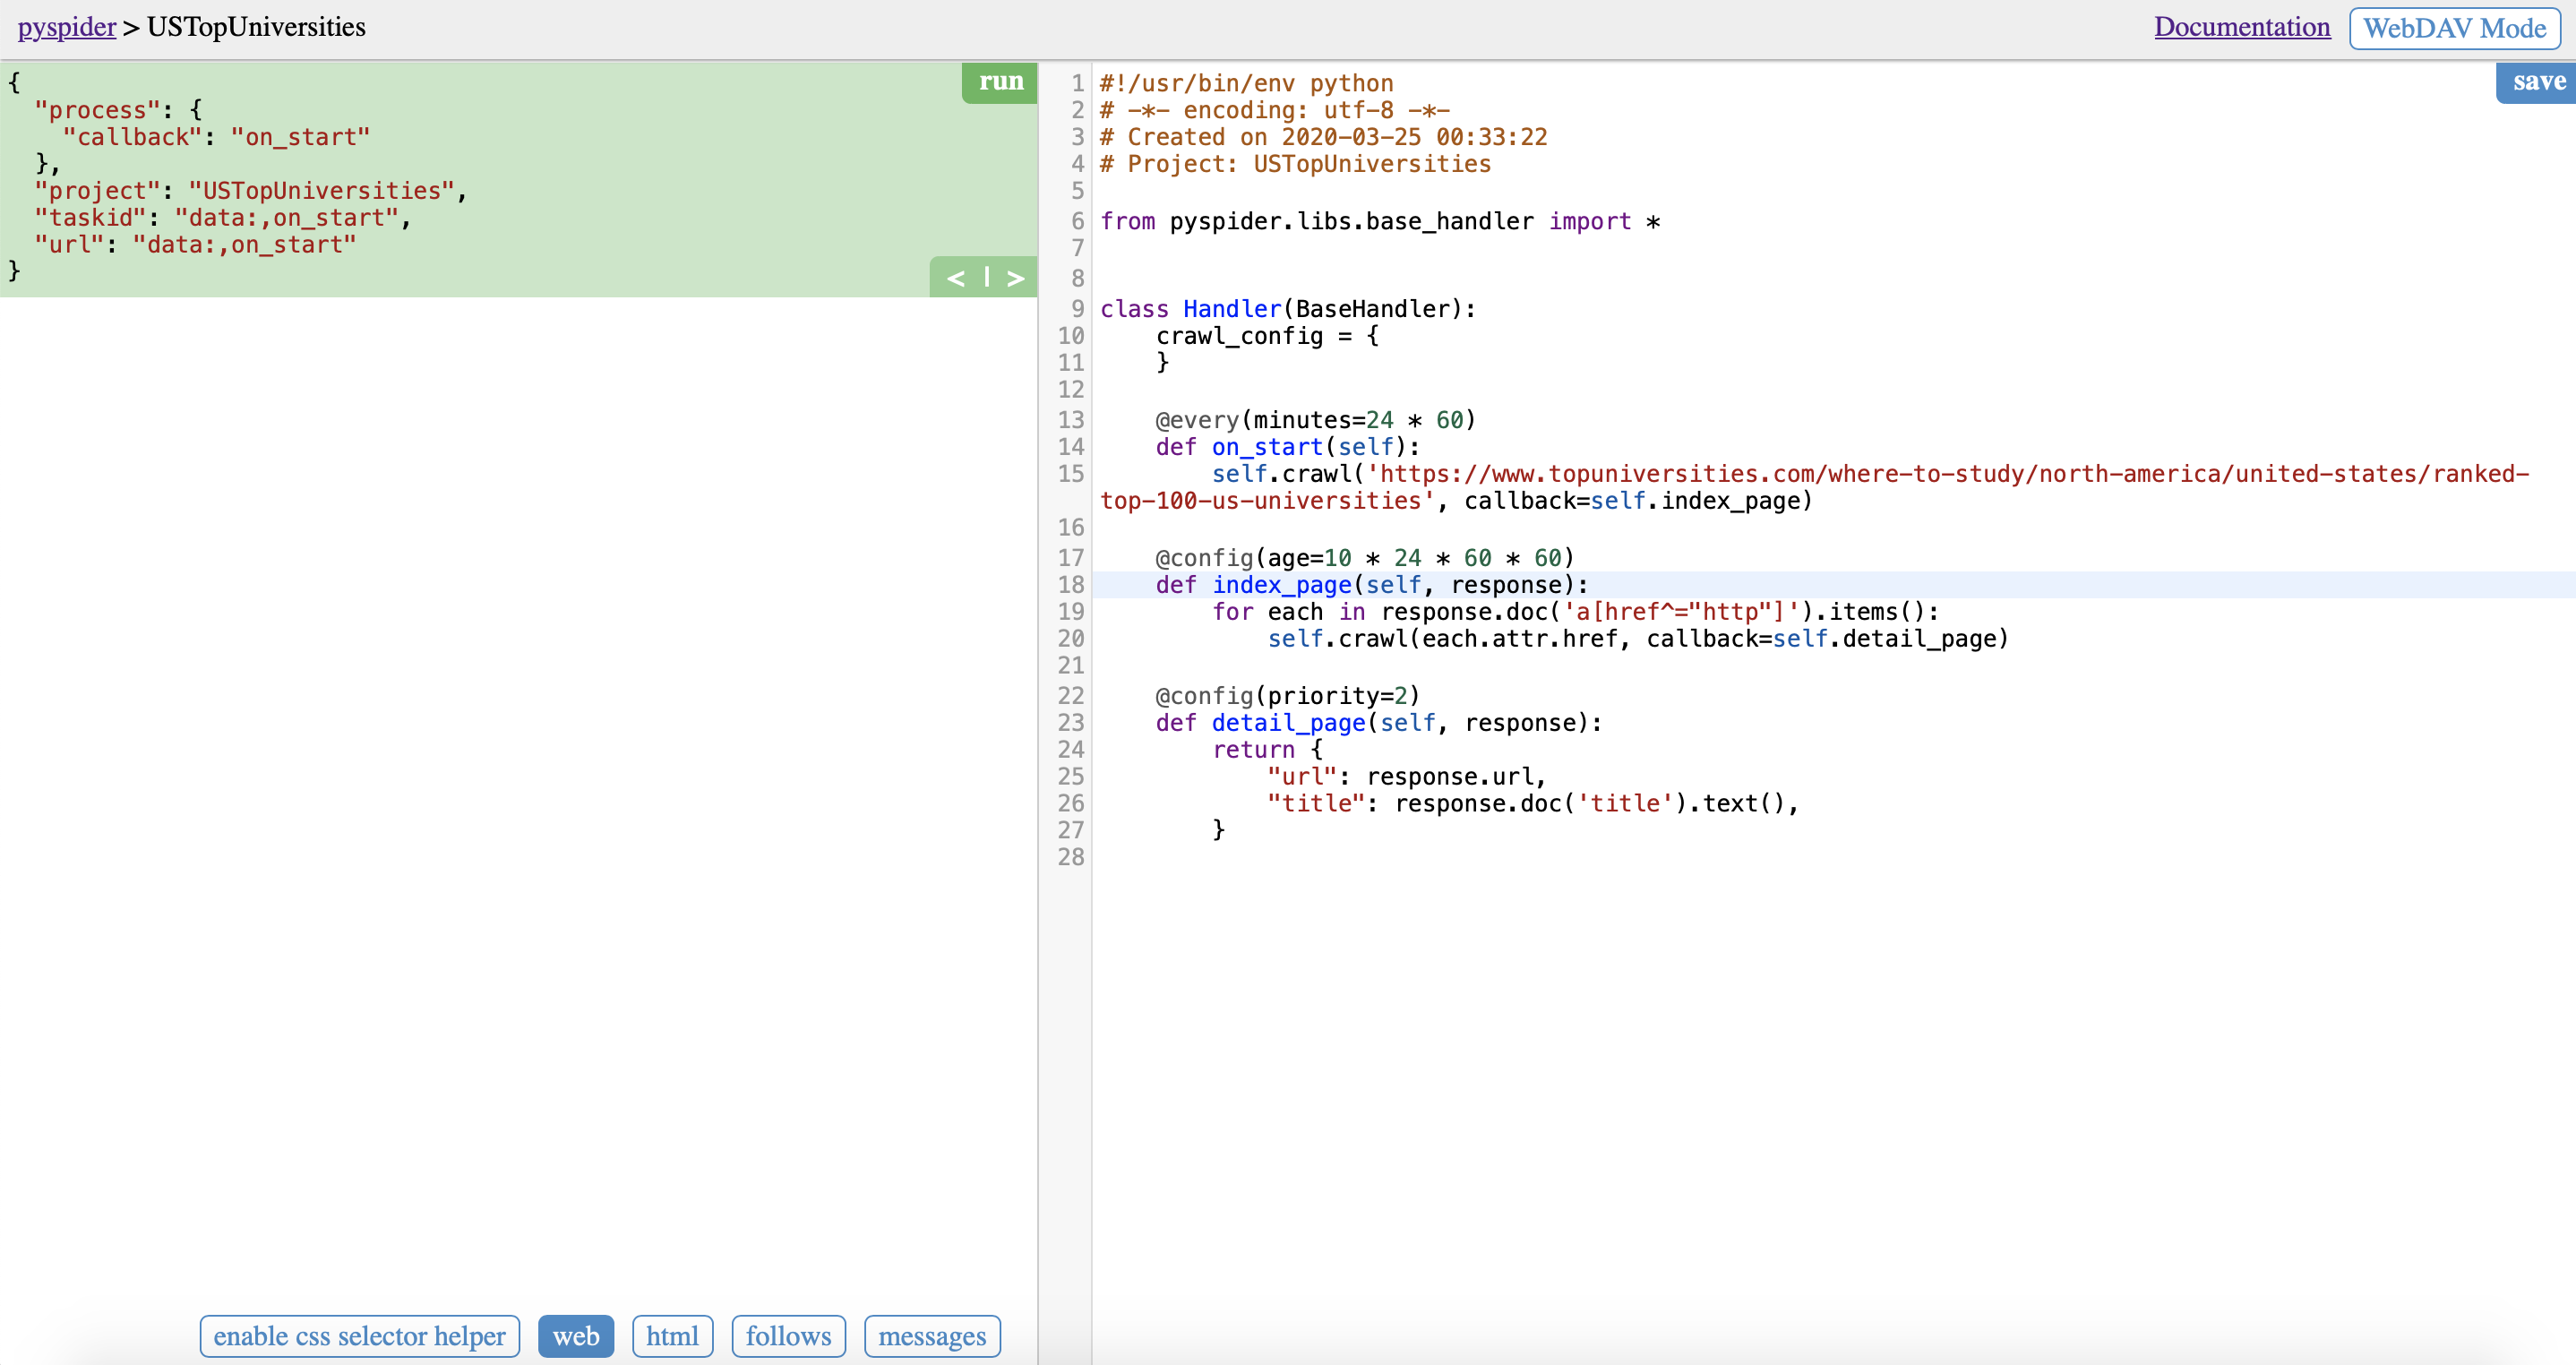

In [16]:
Image("img/3.png")

***Methods***:
<br>on_start: our initial task to create our first crawling task.
<br>index_page: response given from the on_start method and it finds all the links(href) tags, loops each of them, crawl them with detail_page method
<br>detail_page: returns the url and title from the response object
<br>***Annotations***:
<br>@every — task with this annotation will periodically be called after a time given to it, no more cron jobs!
<br>@config(age) —task with this annotation gives time validity to task, ensuring that task will not run the same url <br>again, until the age expires
<br>@config(priority) — task with higher weight will be given more importance in queue

According to our introduction above, this program will find all out-link reference in our start page, craw these out-link pages and return their urls and titles. 
Now, we just check what will happen if we run it. To do this, go back to our dash board, set the status to ***running***, then click ***run*** to execute it. Then, we can check the result by click on the ***Results*** tab, here is what we can see:

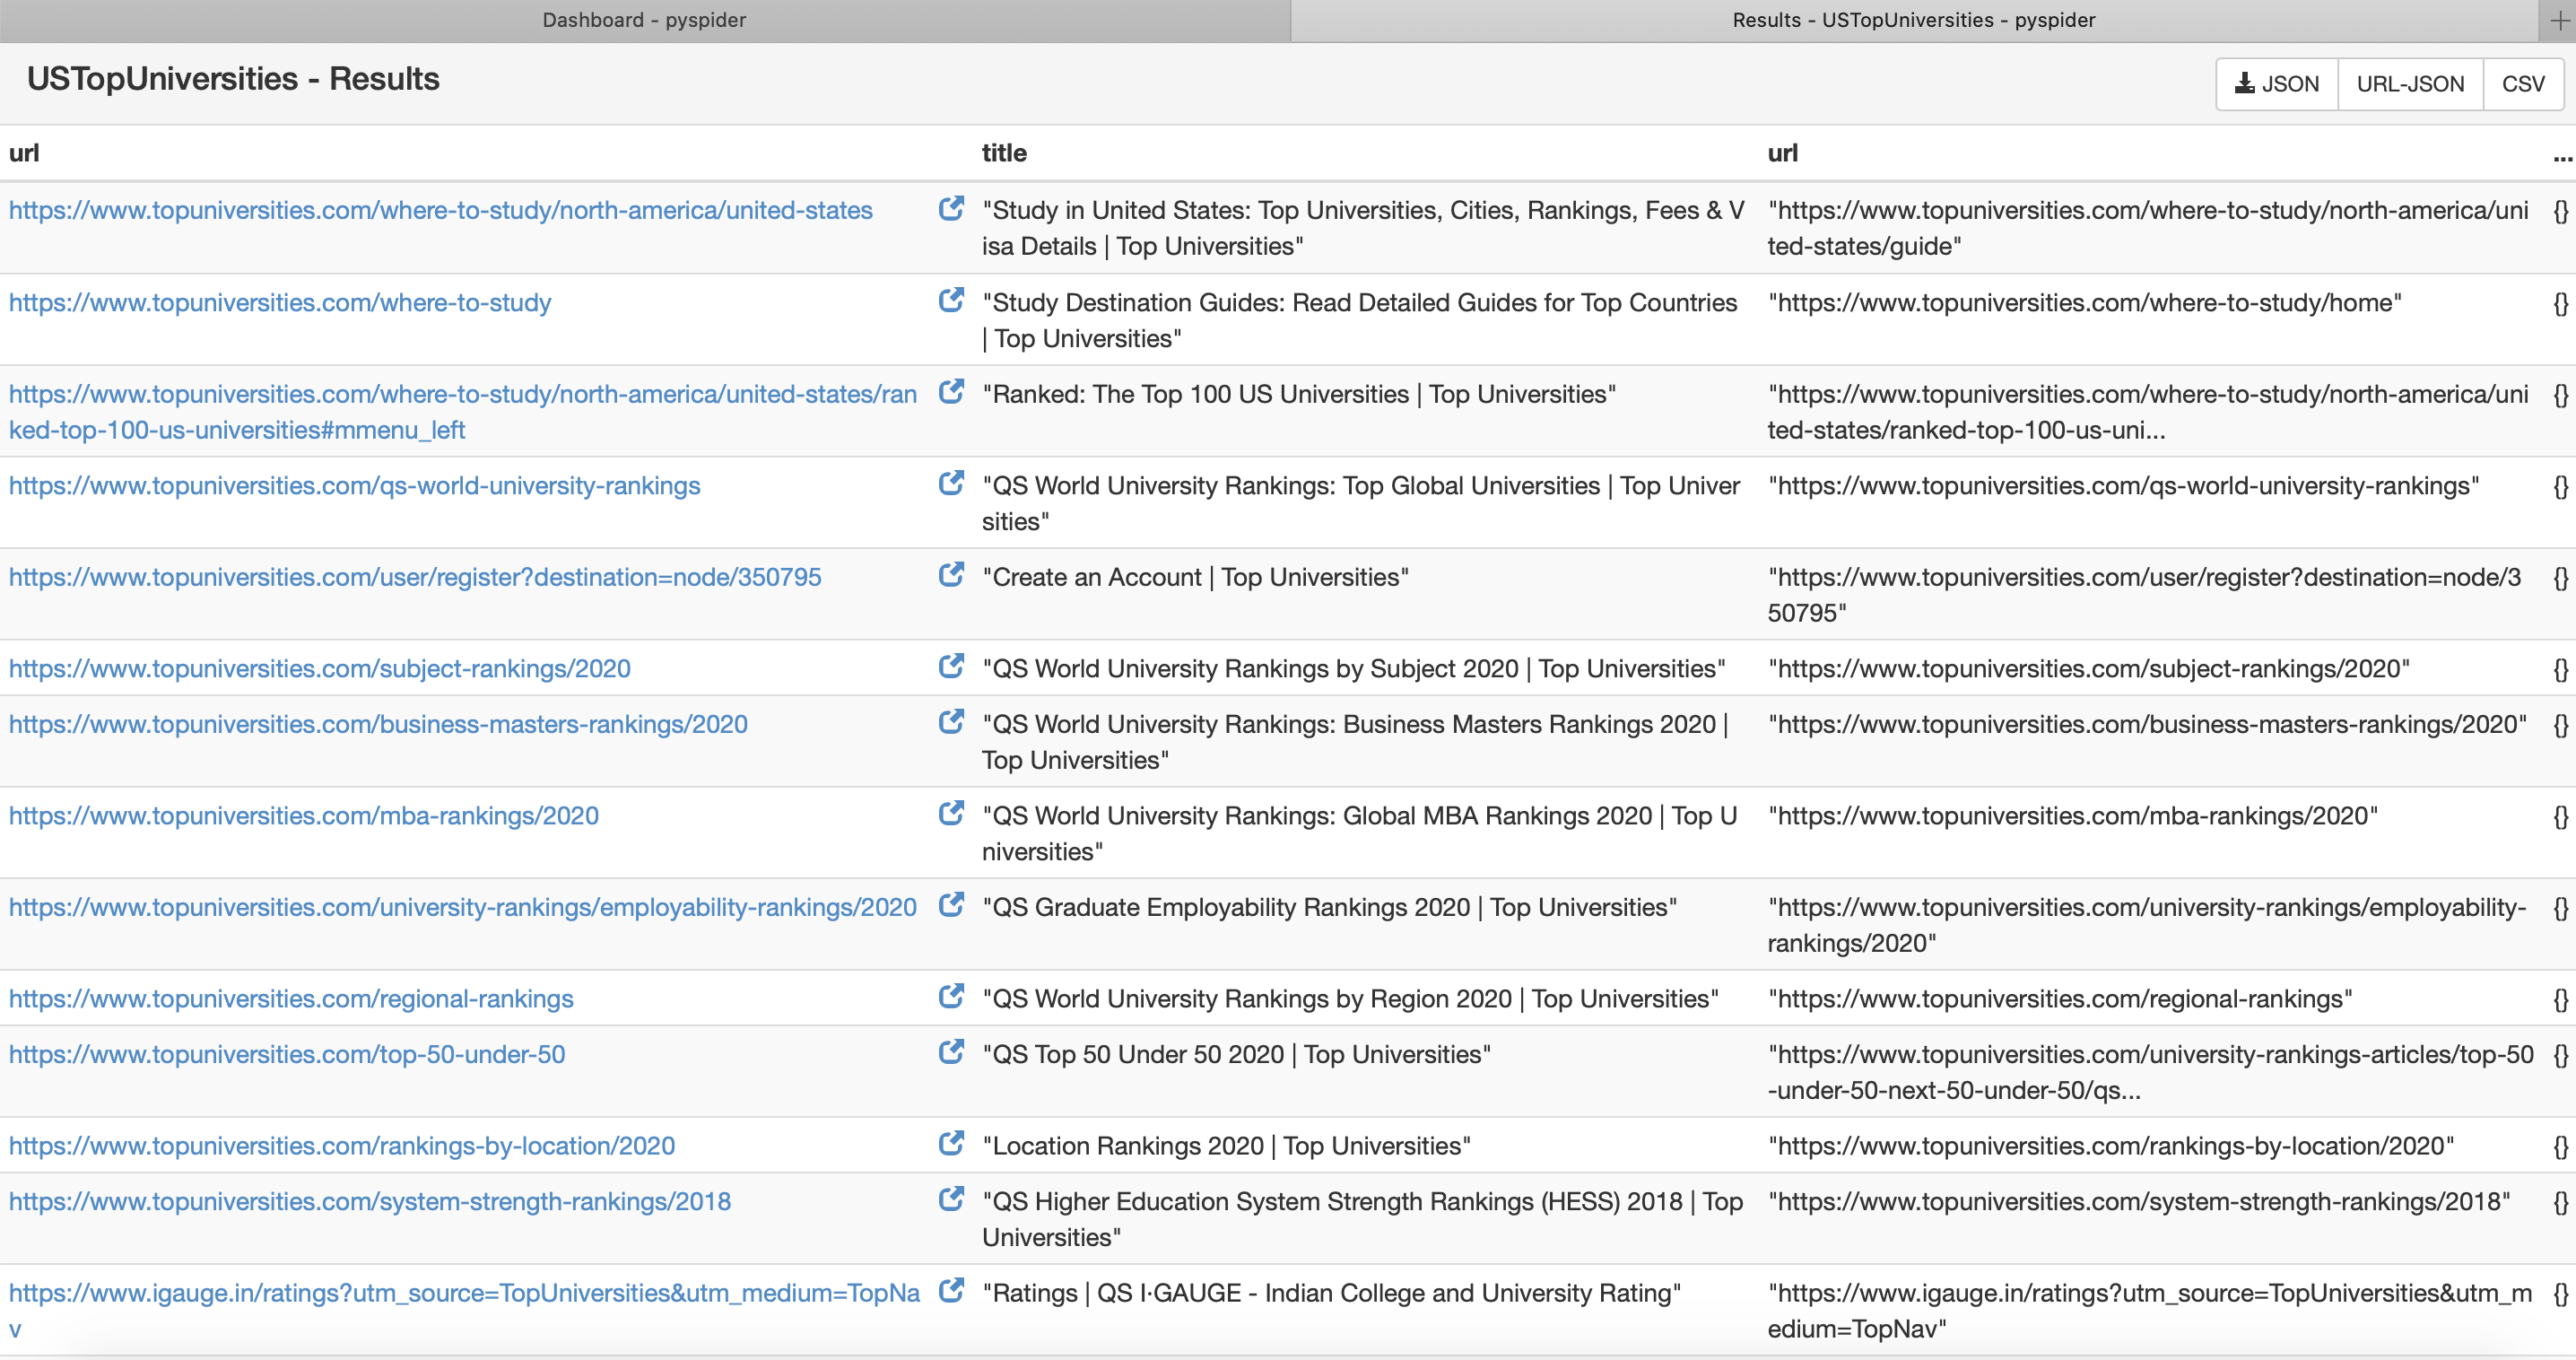

In [17]:
Image("img/4.png")

You can save the data to whatever you want, just by clicking the tab on the top right corner. Besides, as we have mentioned earlier, you could also dump the result to database directly. For example, the code below is a very simple version to dump the result, we won't go further here. 

In [ ]:
from pyspider.database.mysql.mysqldb import SQL

#add this line at the end of the script
def on_result(self,result):
        sql = SQL()
        sql.insert('USTopUniversities',**result) 

# 3. Normal Usage
As we stated above, we want to scrape some data from the top 100 US universities, so, we need to click on the university detail urls on the start page and to retrieve more information from these outer links. In our basic usage part, we just get information of all the outer-links on the start page and we haven't retrieve useful data for our purpose at all. So, let's go back to our script board, and click the green ***run*** button, we can find a red 1 above the ***follow*** tab, click on the ***follow*** button to switch to follow panel, then click the green play button, then we can see the page below:

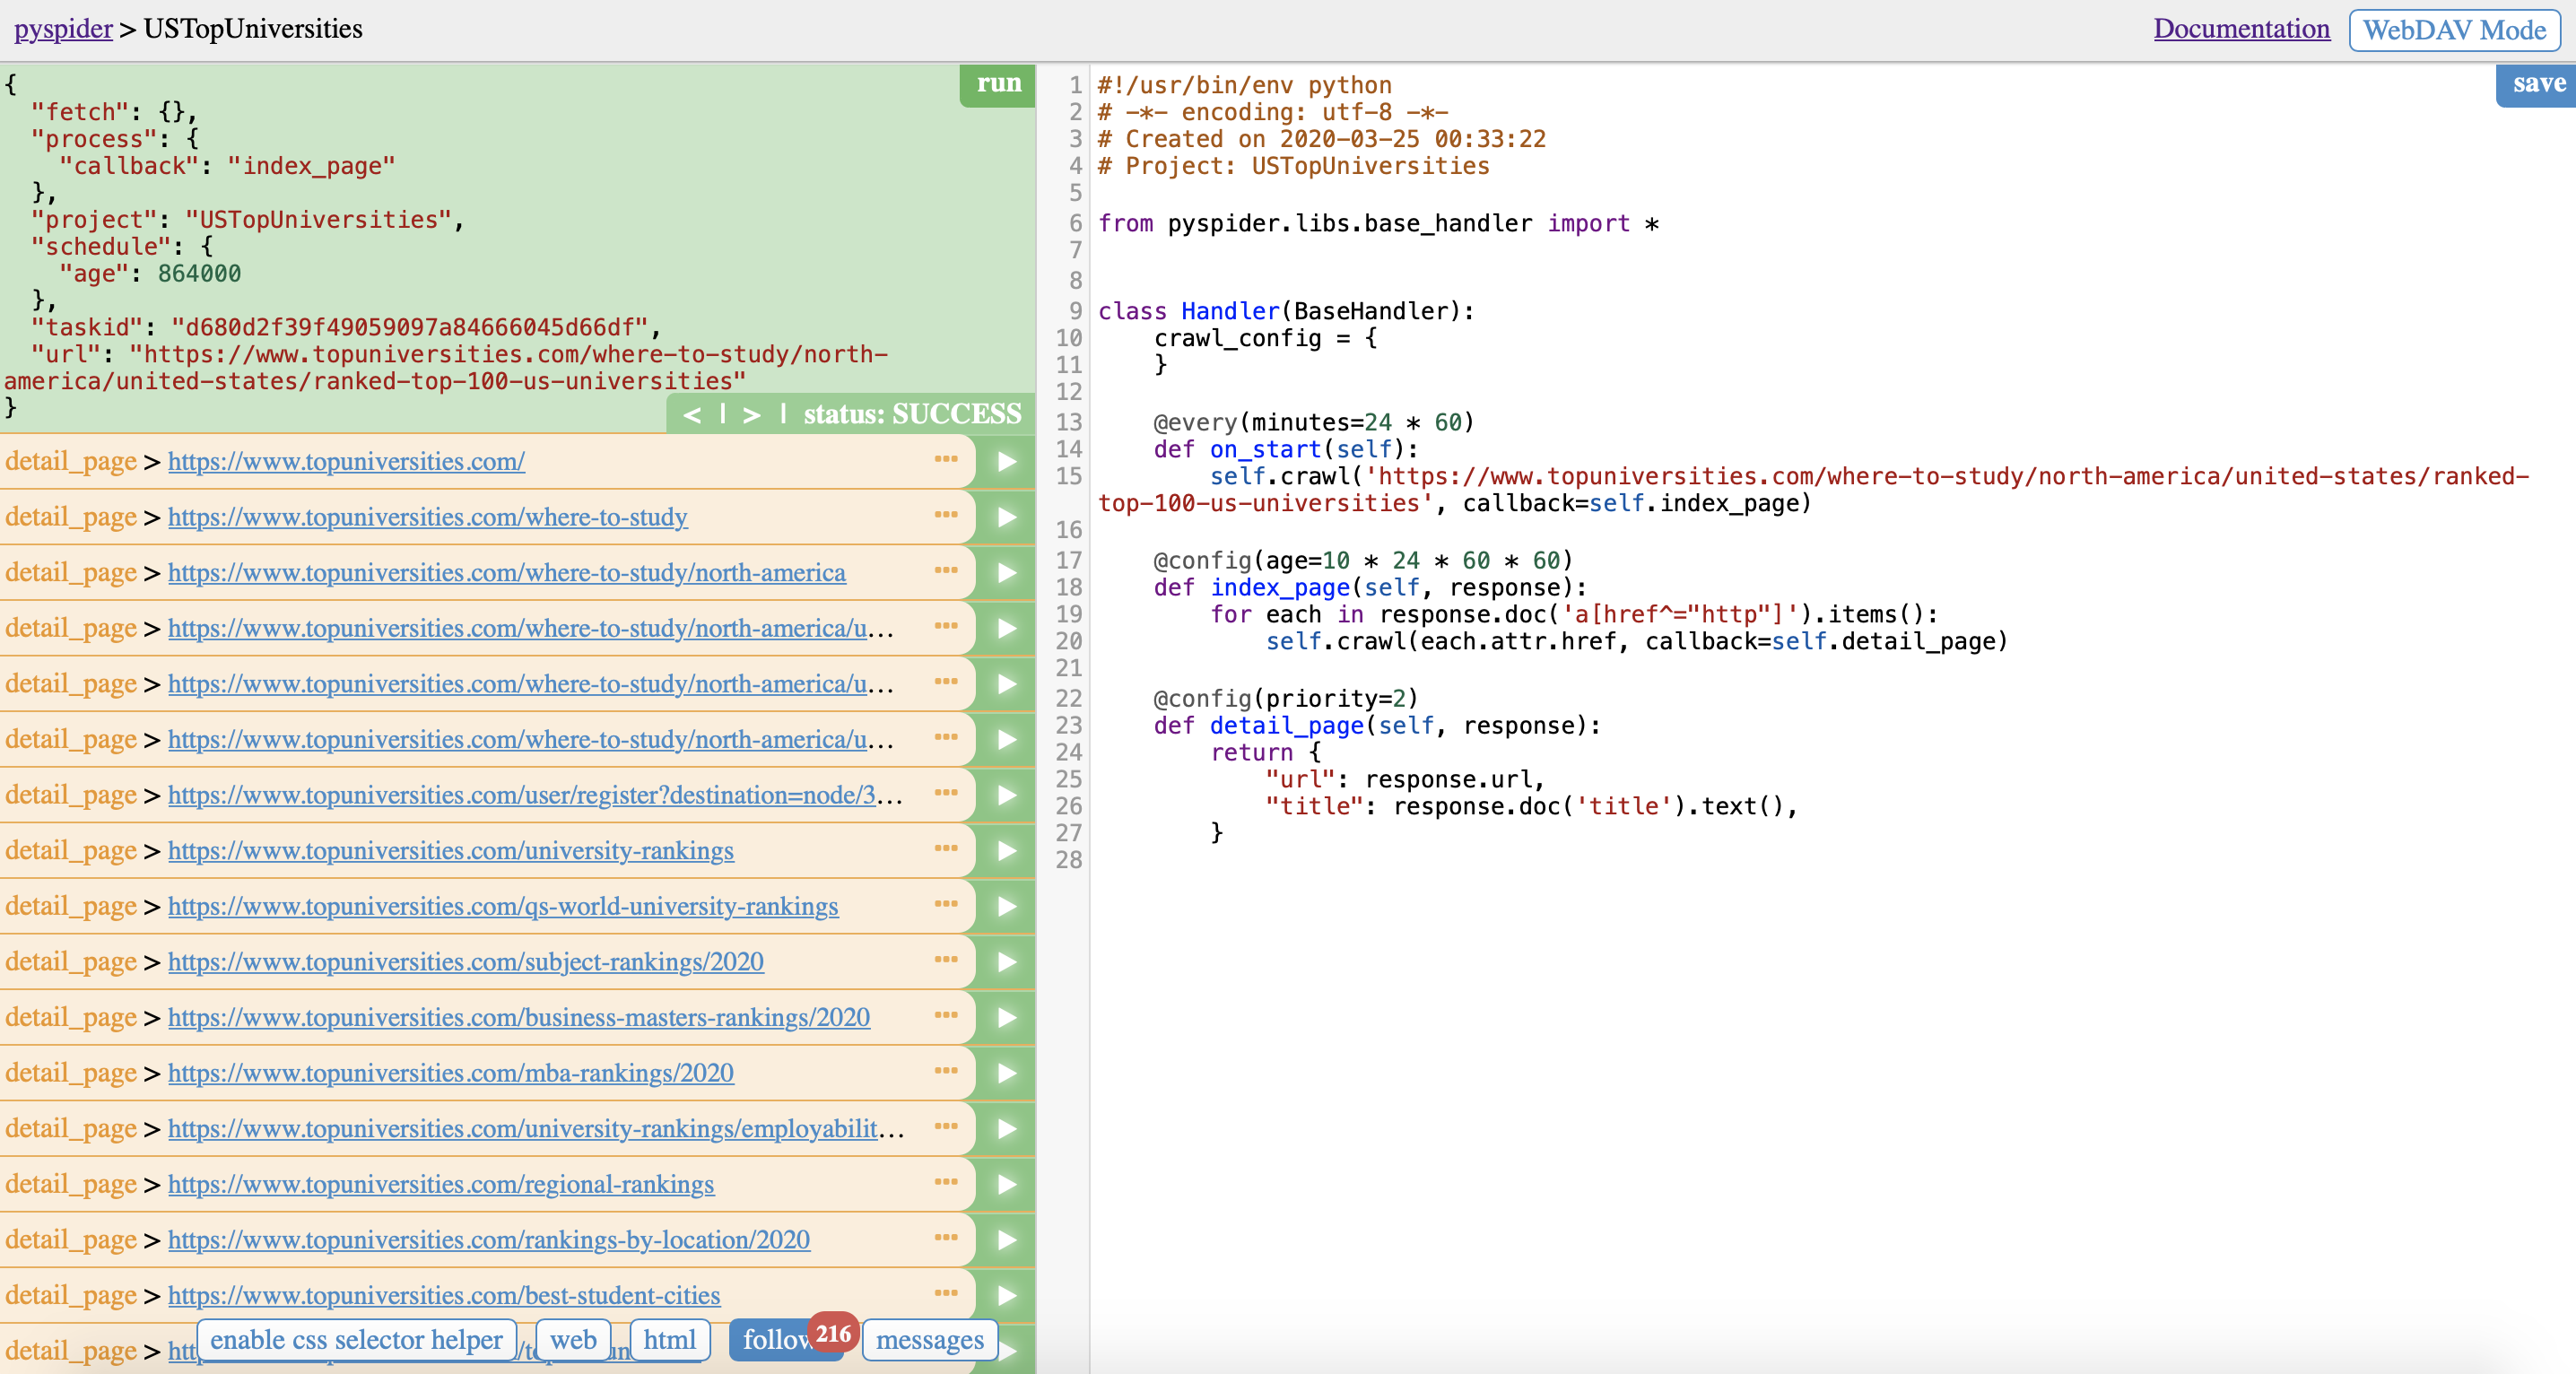

In [18]:
Image("img/5.png")

We can find out that the detail pages' url corresponds to what we got in our result. Now, it's pickout detail pages about the universities. But how? Remember we can always use the power of python or anything you are familiar with to extract information. But using tools like CSS selector is recommended. CSS selectors are patterns used by CSS to select HTML elements which are wanted to style. As elements containing information may have different style in document, It's appropriate to use CSS Selector to select elements we want. More information about CSS selectors could be found in links:
https://www.w3schools.com/cssref/css_selectors.asp
We can use CSS Selector with built-in response.doc object. 
Go to our initial page website, right click, then choose ***Inspect***, in the ***Elements*** tab, the corresponded html and css will be displayed on the right. Move the mouse around, every line on the right corresponds to every part on the left. We locate our mouse to the blue part in the picture below, where the outer-link adress shows up. So, what we need to do is filtering the outer-links like this from the html page. 

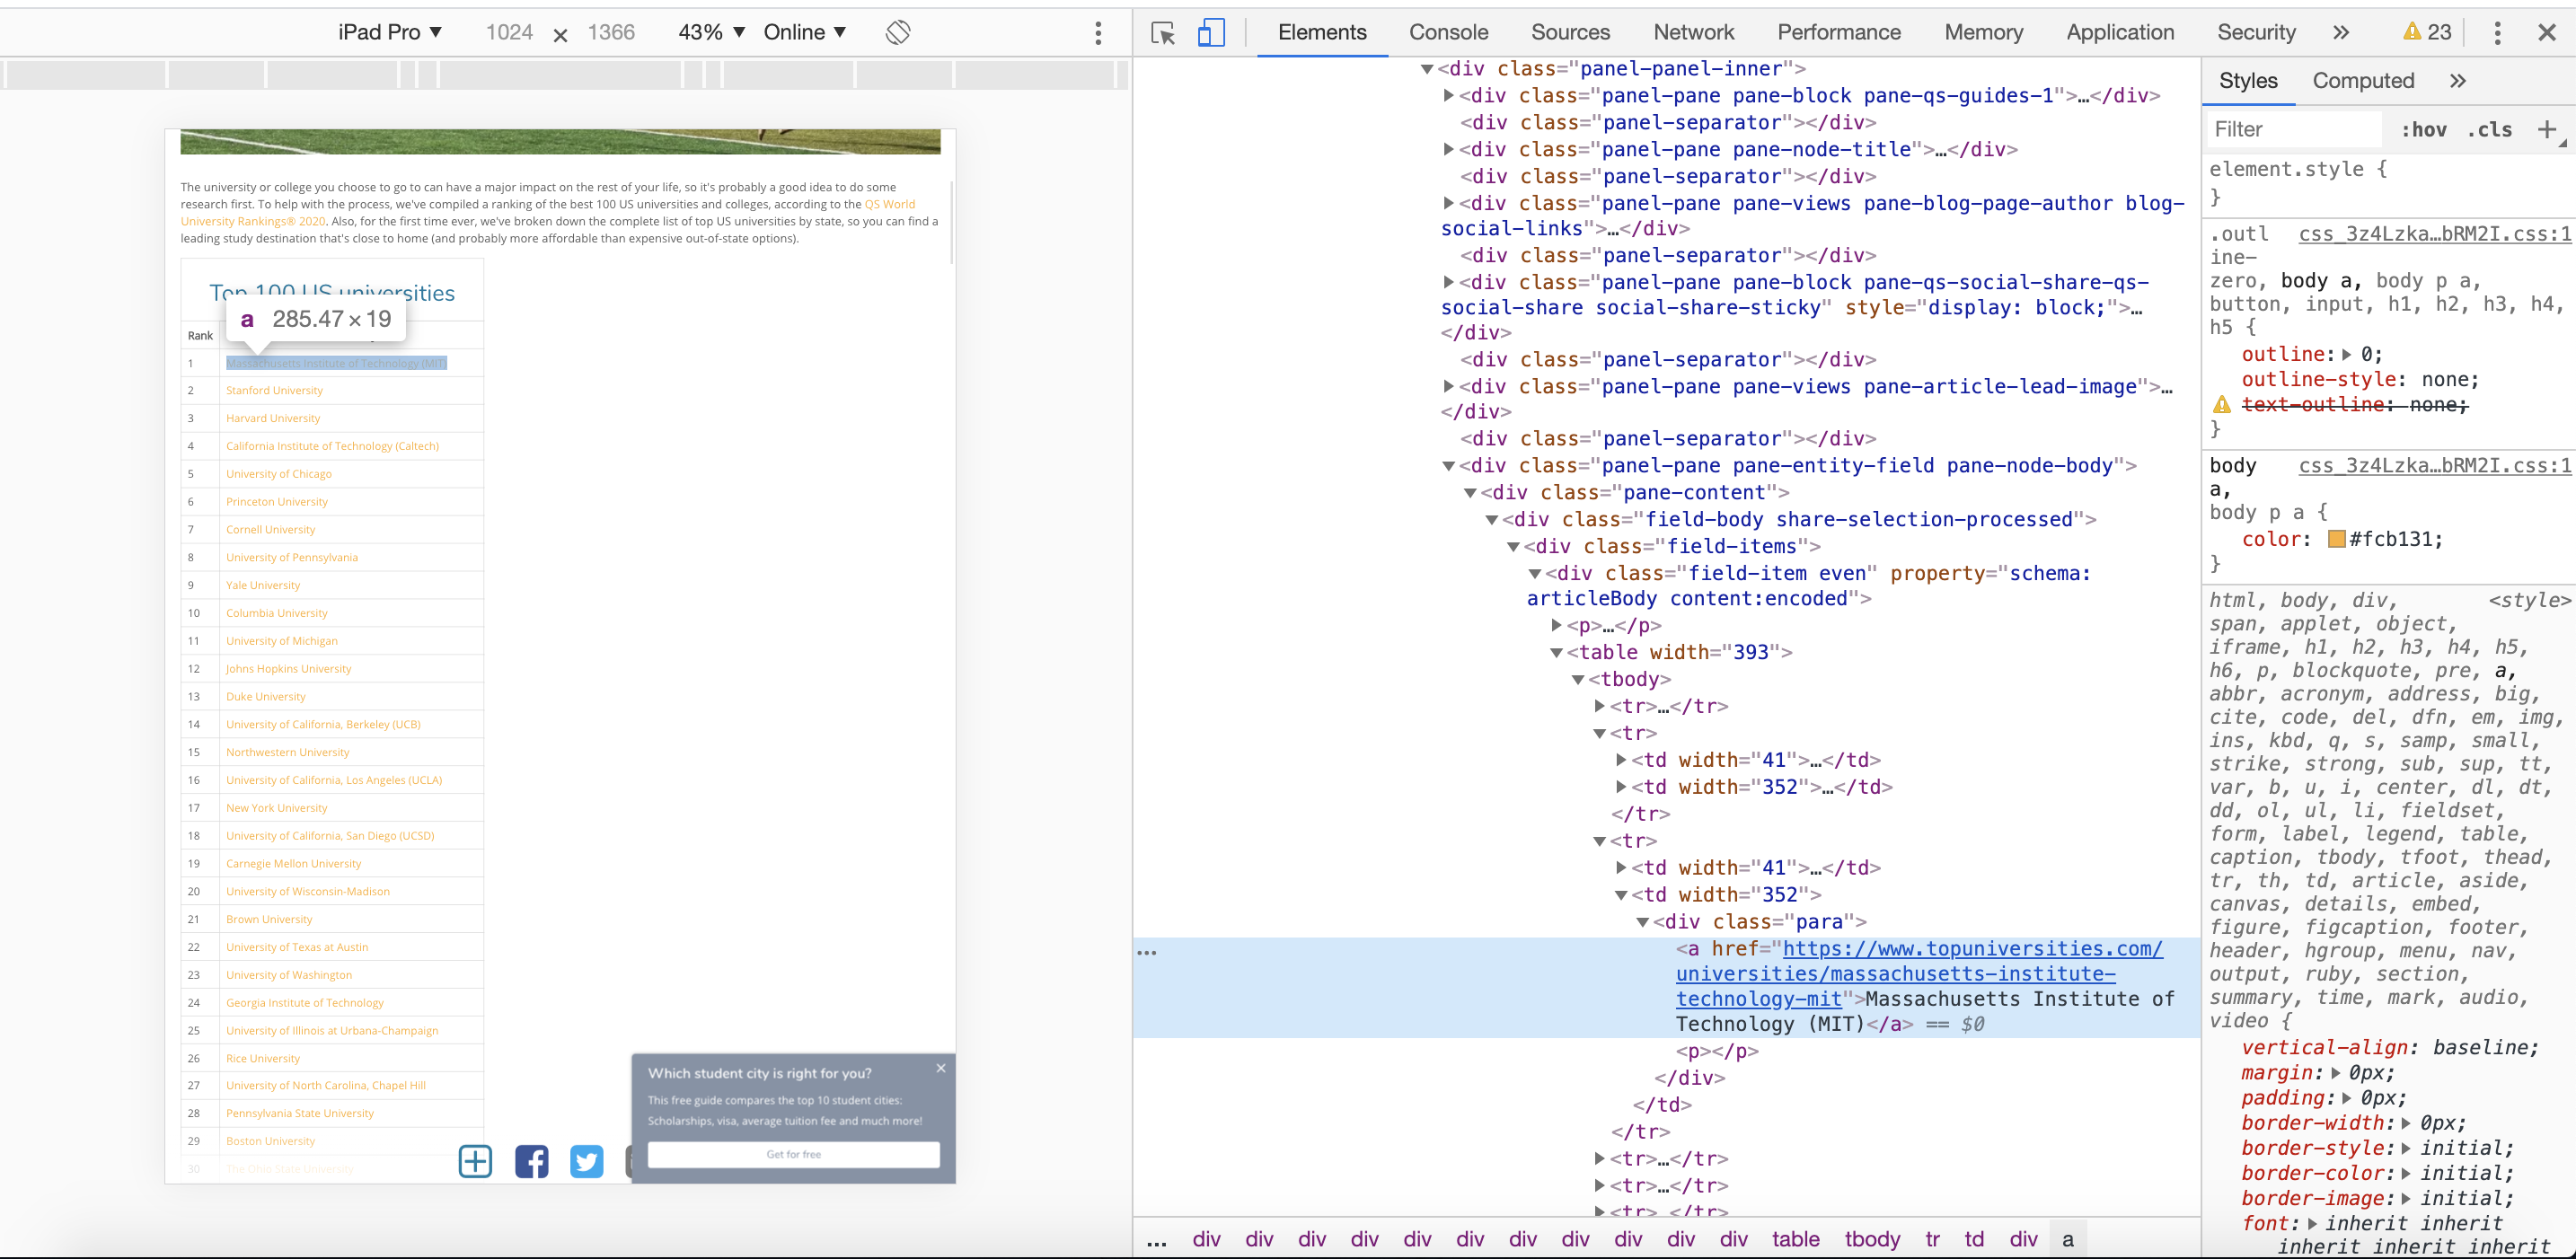

In [22]:
Image("img/6.png")

Note that our target link is in ***div*** division in css, class is "para", in our script, change the index_page func to: 

In [ ]:
def index_page(self, response):
    for each in response.doc('.para a').items():
        detail_url = each('a').attr.href
        print(detail_url)

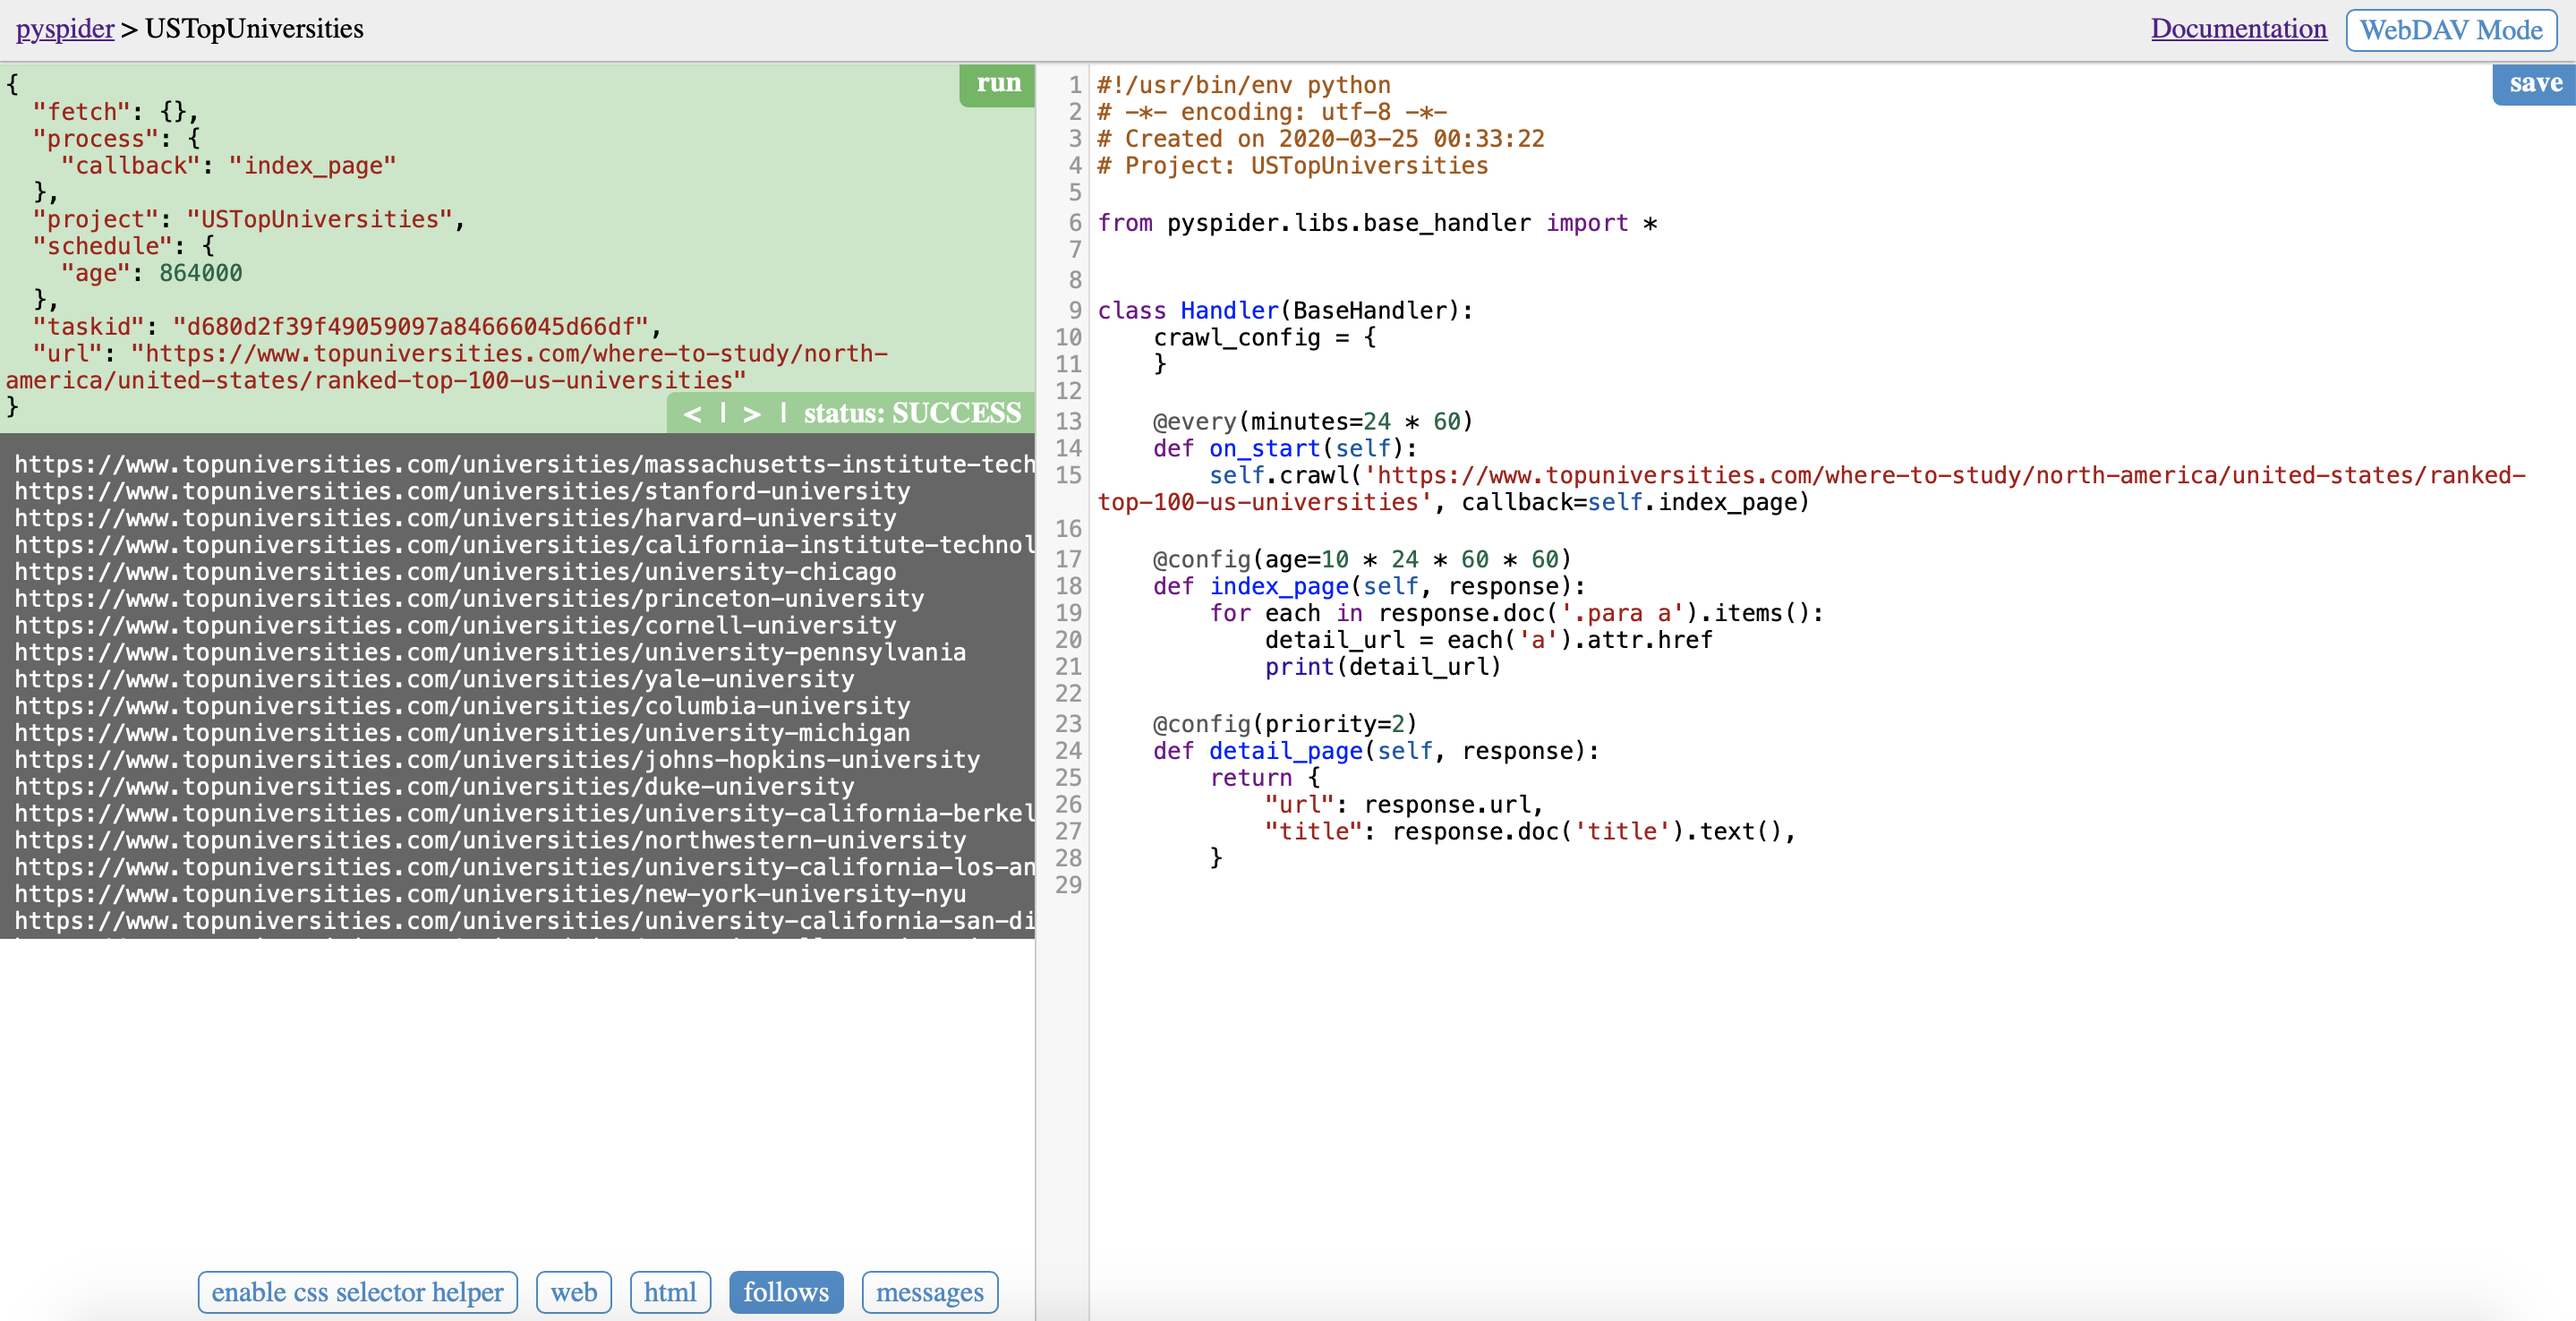

In [23]:
Image("img/7.png")

Yes, that's what we want! Filter the desired outer-links! Follow the process we illustrated above, inspect the css notations of our desired part in the outer-linked pages, we can retrieve our data. Finally, we change our code to:

In [ ]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
# Created on 2020-03-25 00:33:22
# Project: USTopUniversities

from pyspider.libs.base_handler import *


class Handler(BaseHandler):
    crawl_config = {
    }

    @every(minutes=24 * 60)
    def on_start(self):
        self.crawl('https://www.topuniversities.com/where-to-study/north-america/united-states/ranked-top-100-us-universities', callback=self.index_page)

    @config(age=10 * 24 * 60 * 60)
    def index_page(self, response):
        for each in response.doc('.para a').items():
            self.crawl(each('a').attr.href, callback=self.detail_page)


    @config(priority=2)
    def detail_page(self, response):
        school_name = response.doc('.title_info h1').text()
        total_students = 0
        faculty_staff = 0
        
        content = response.doc('div[class="key pull-left"]')
        for each in content.items():
            if (each('label').text() == "Total Students"):
                total_students = each('.val').text()
            if (each('label').text() == 'Academic Faculty Staff'):
                faculty_staff = each('.val').text()
      
        return {
            "school_name": school_name,
            "total_students": total_students,
            "faculty_staff": faculty_staff,
        }
    

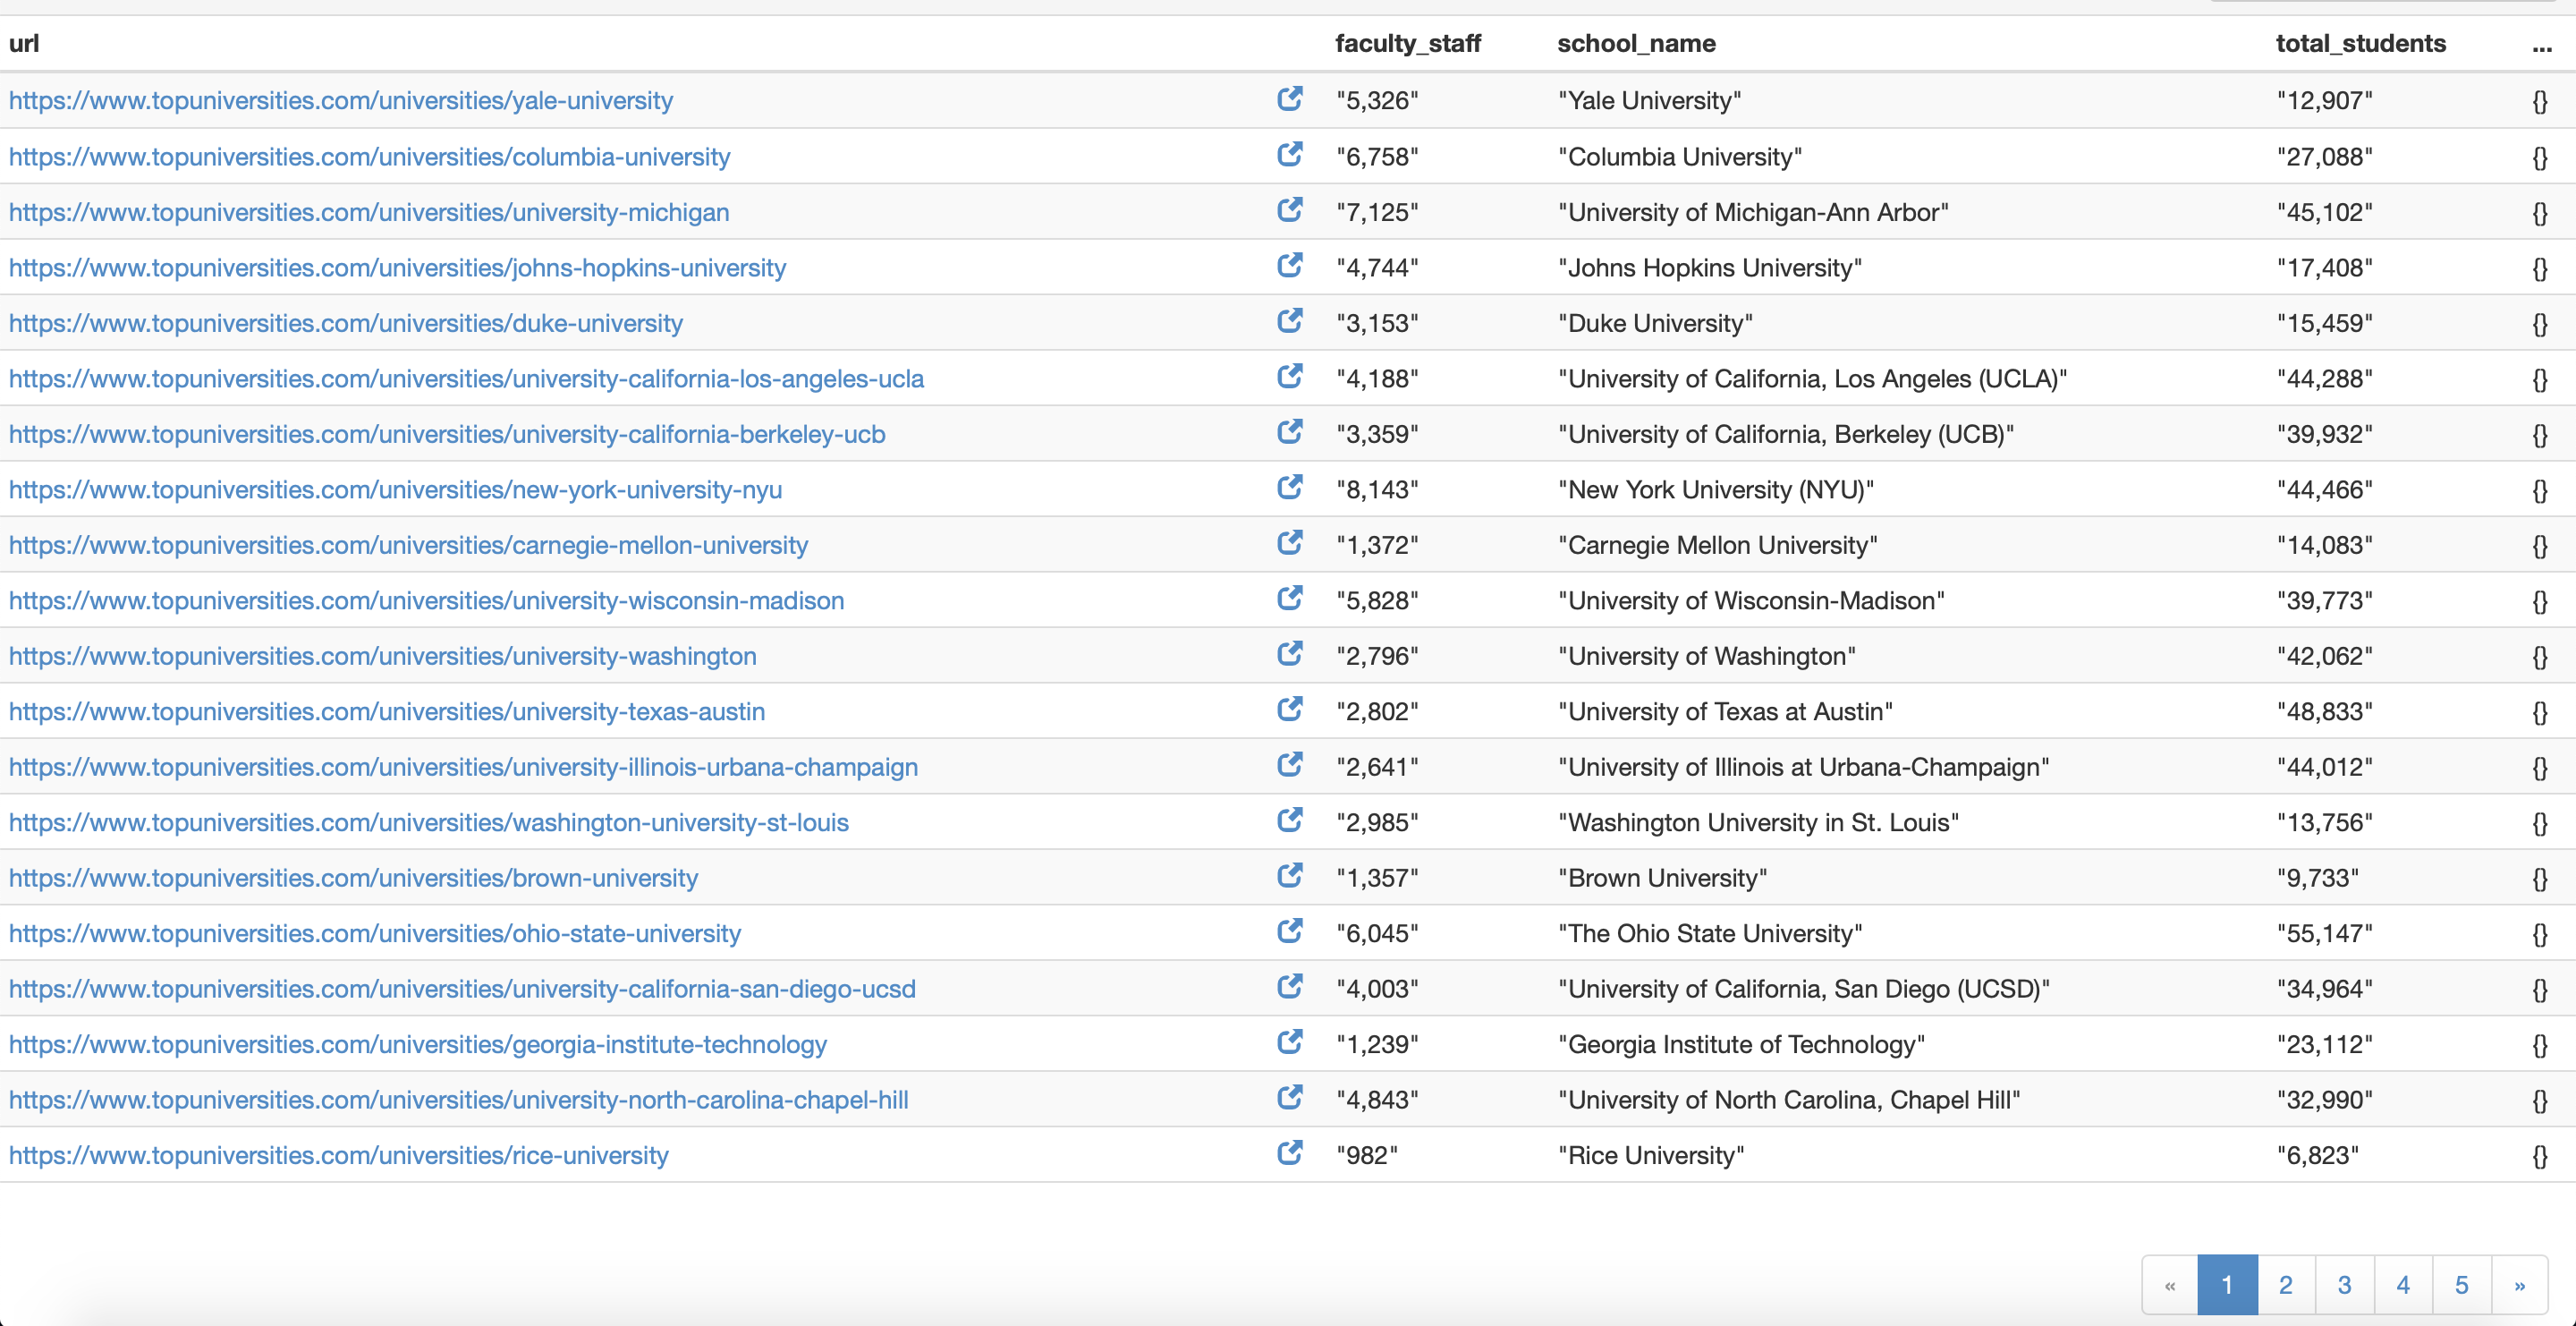

In [3]:
Image("img/8.png")
# here we can check our result

# 4. Advanced Usage
### 4.1 AJAX
we have discussed how to extract links and information from HTML documents. However, web contents are becoming more complicated using some technology like AJAX. You may find that page looks different with it in browser, the information you want to extract is not in the HTML of the page.

In this part, we will look into some snippets of web page cases using the technology like AJAX or needs some HTTP parameters besides URL. 
You may find elements missing in HTML fetched by pyspider or wget. When you open it in browser some elements appear after page loaded with(maybe not) a 'loading' animation or words.
For example, if you grep messages from this page: 
<br>https://www.usnews.com/best-colleges/rankings/national-universities
<br> You would find that, if we crawel this website directly, we could only get 10 results. But if you go to this website by your browser, you will find that this page seems can load infinitely when you scroll your mouse down to the bottom. 
As AJAX data is transferred in HTTP, we can find the real request with the help of Chrome Developer Tools. Open the webpage above and then open the DevTools, switch to Network panel, where you can see:

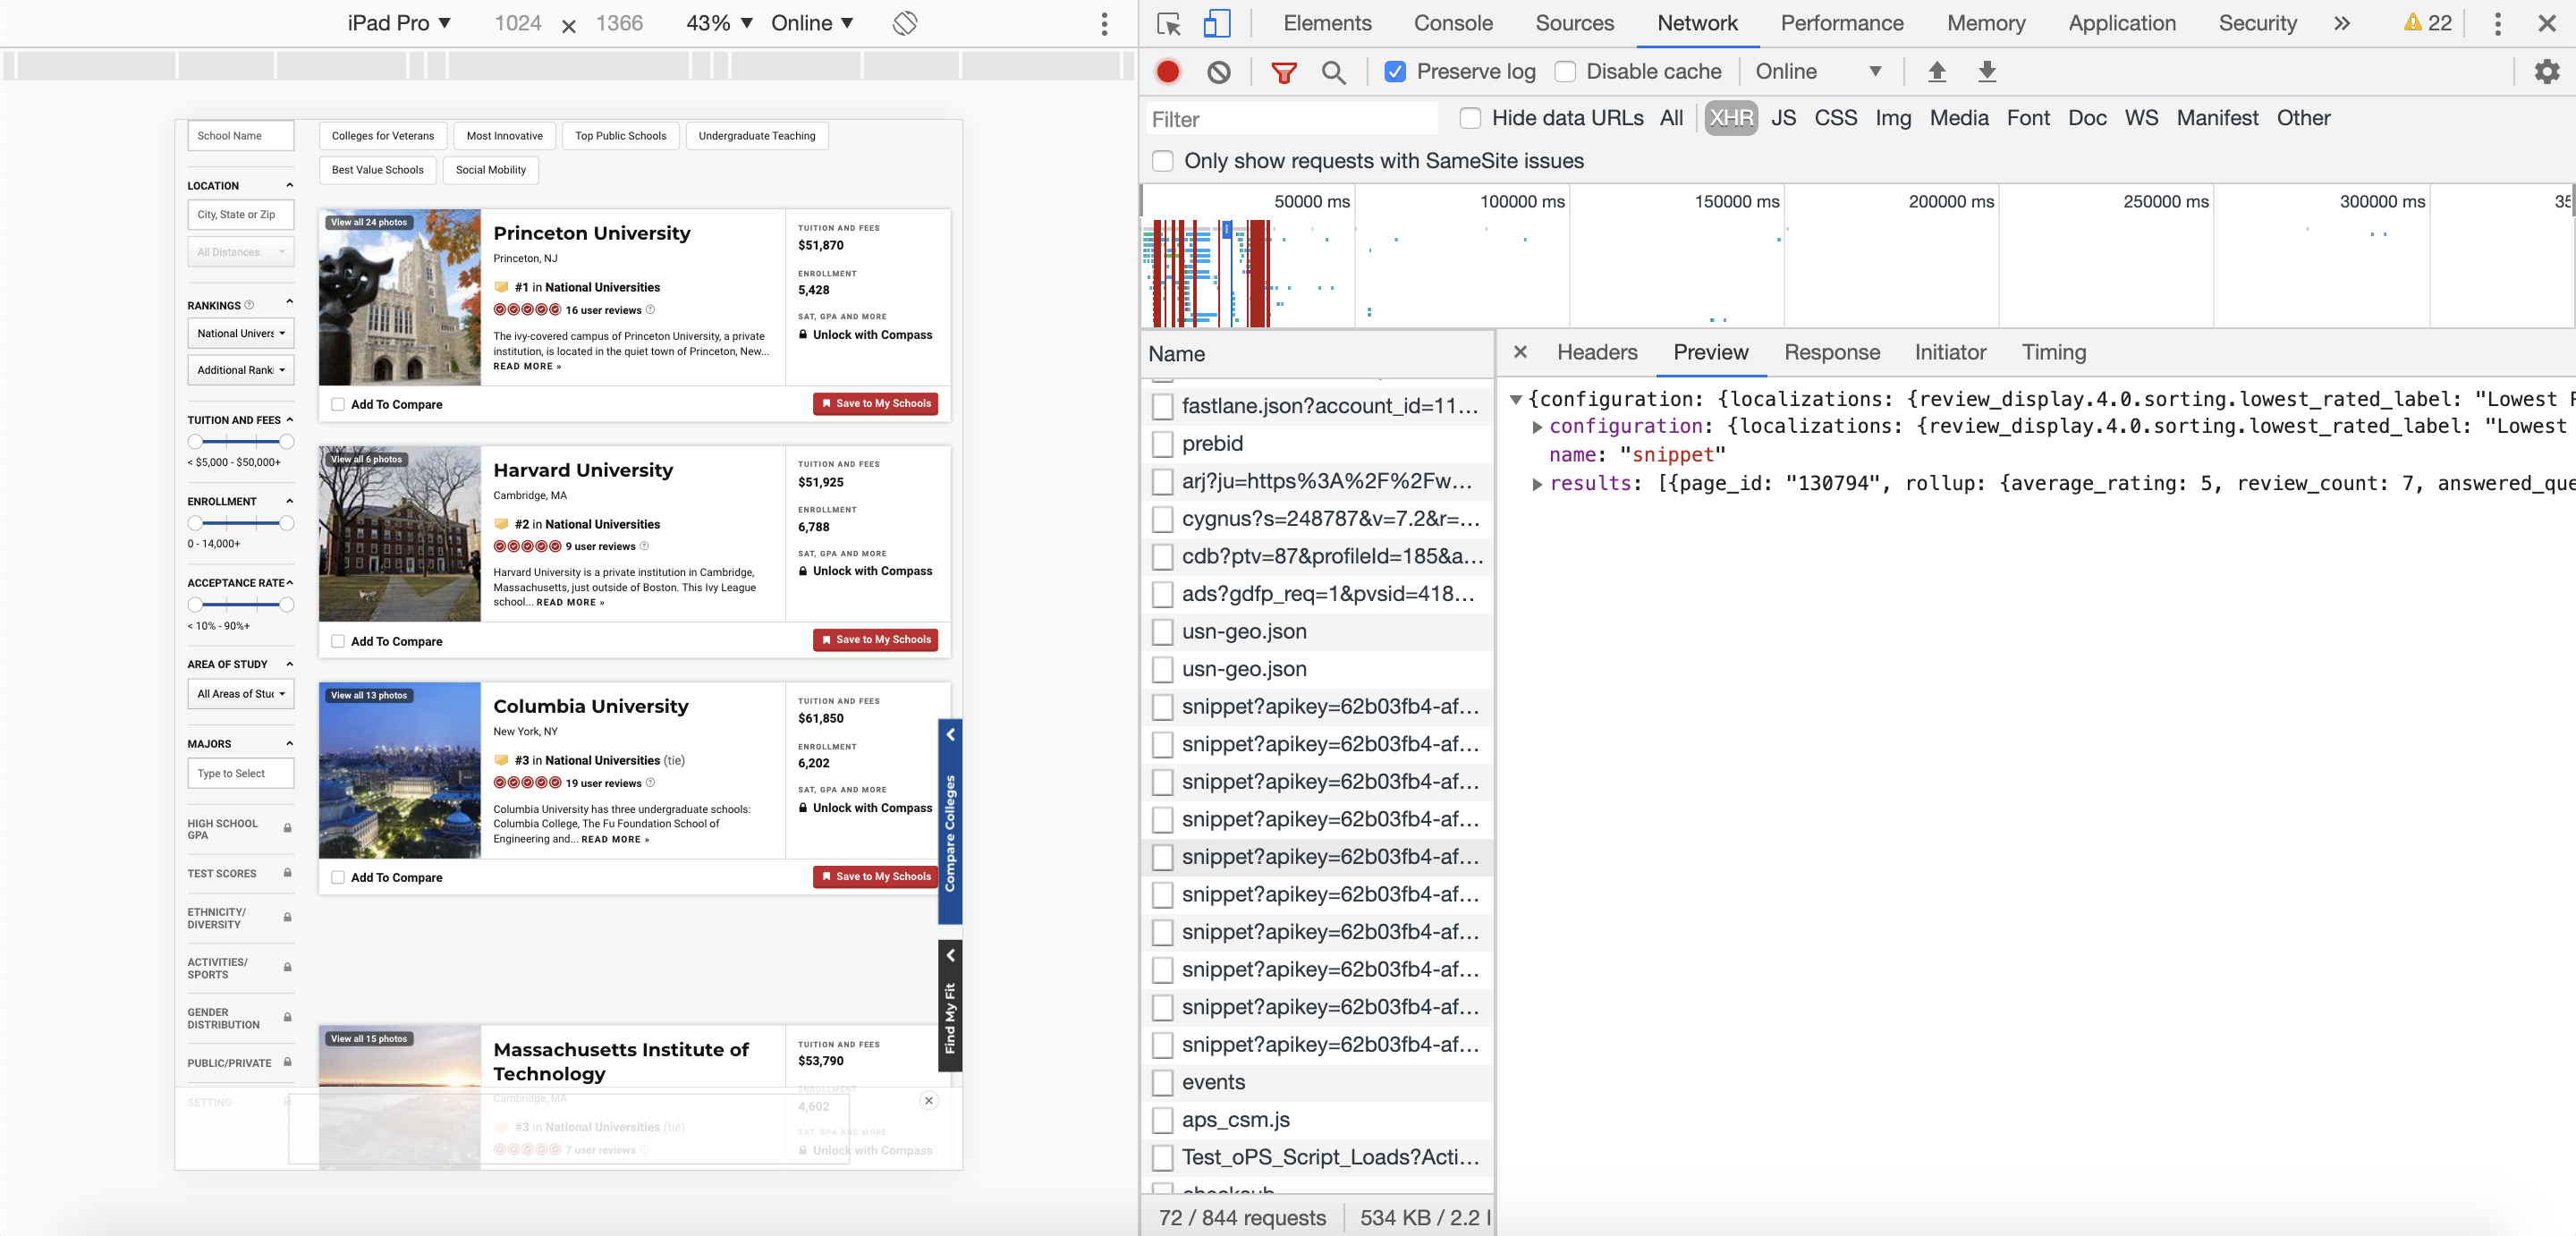

In [4]:
Image('img/9.png')

where we can find some data as the displayed review scores. AJAX is using XMLHttpRequest object to send and retrieve data which is generally shorted as "XHR". Use Filter (funnel icon) to filter out the XHR requests. As we can see JSON data contained there, we can retrieve this JSON data in our script:

In [ ]:
class Handler(BaseHandler):
    # set a User-Agent is to mimic a browser visit
    crawl_config = {
        'headers' : {
            'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36', 
        }
    }

    @every(minutes=24 * 60)
    def on_start(self):
        self.crawl('https://www.usnews.com/best-colleges/rankings/national-universities', callback=self.index_page)
        
    def index_page(self, response):
        return response.json['configuration']
        

For example, we did this on on Chinese movie website:
<br>https://movie.douban.com/tag/#/
<br>Here is our result:

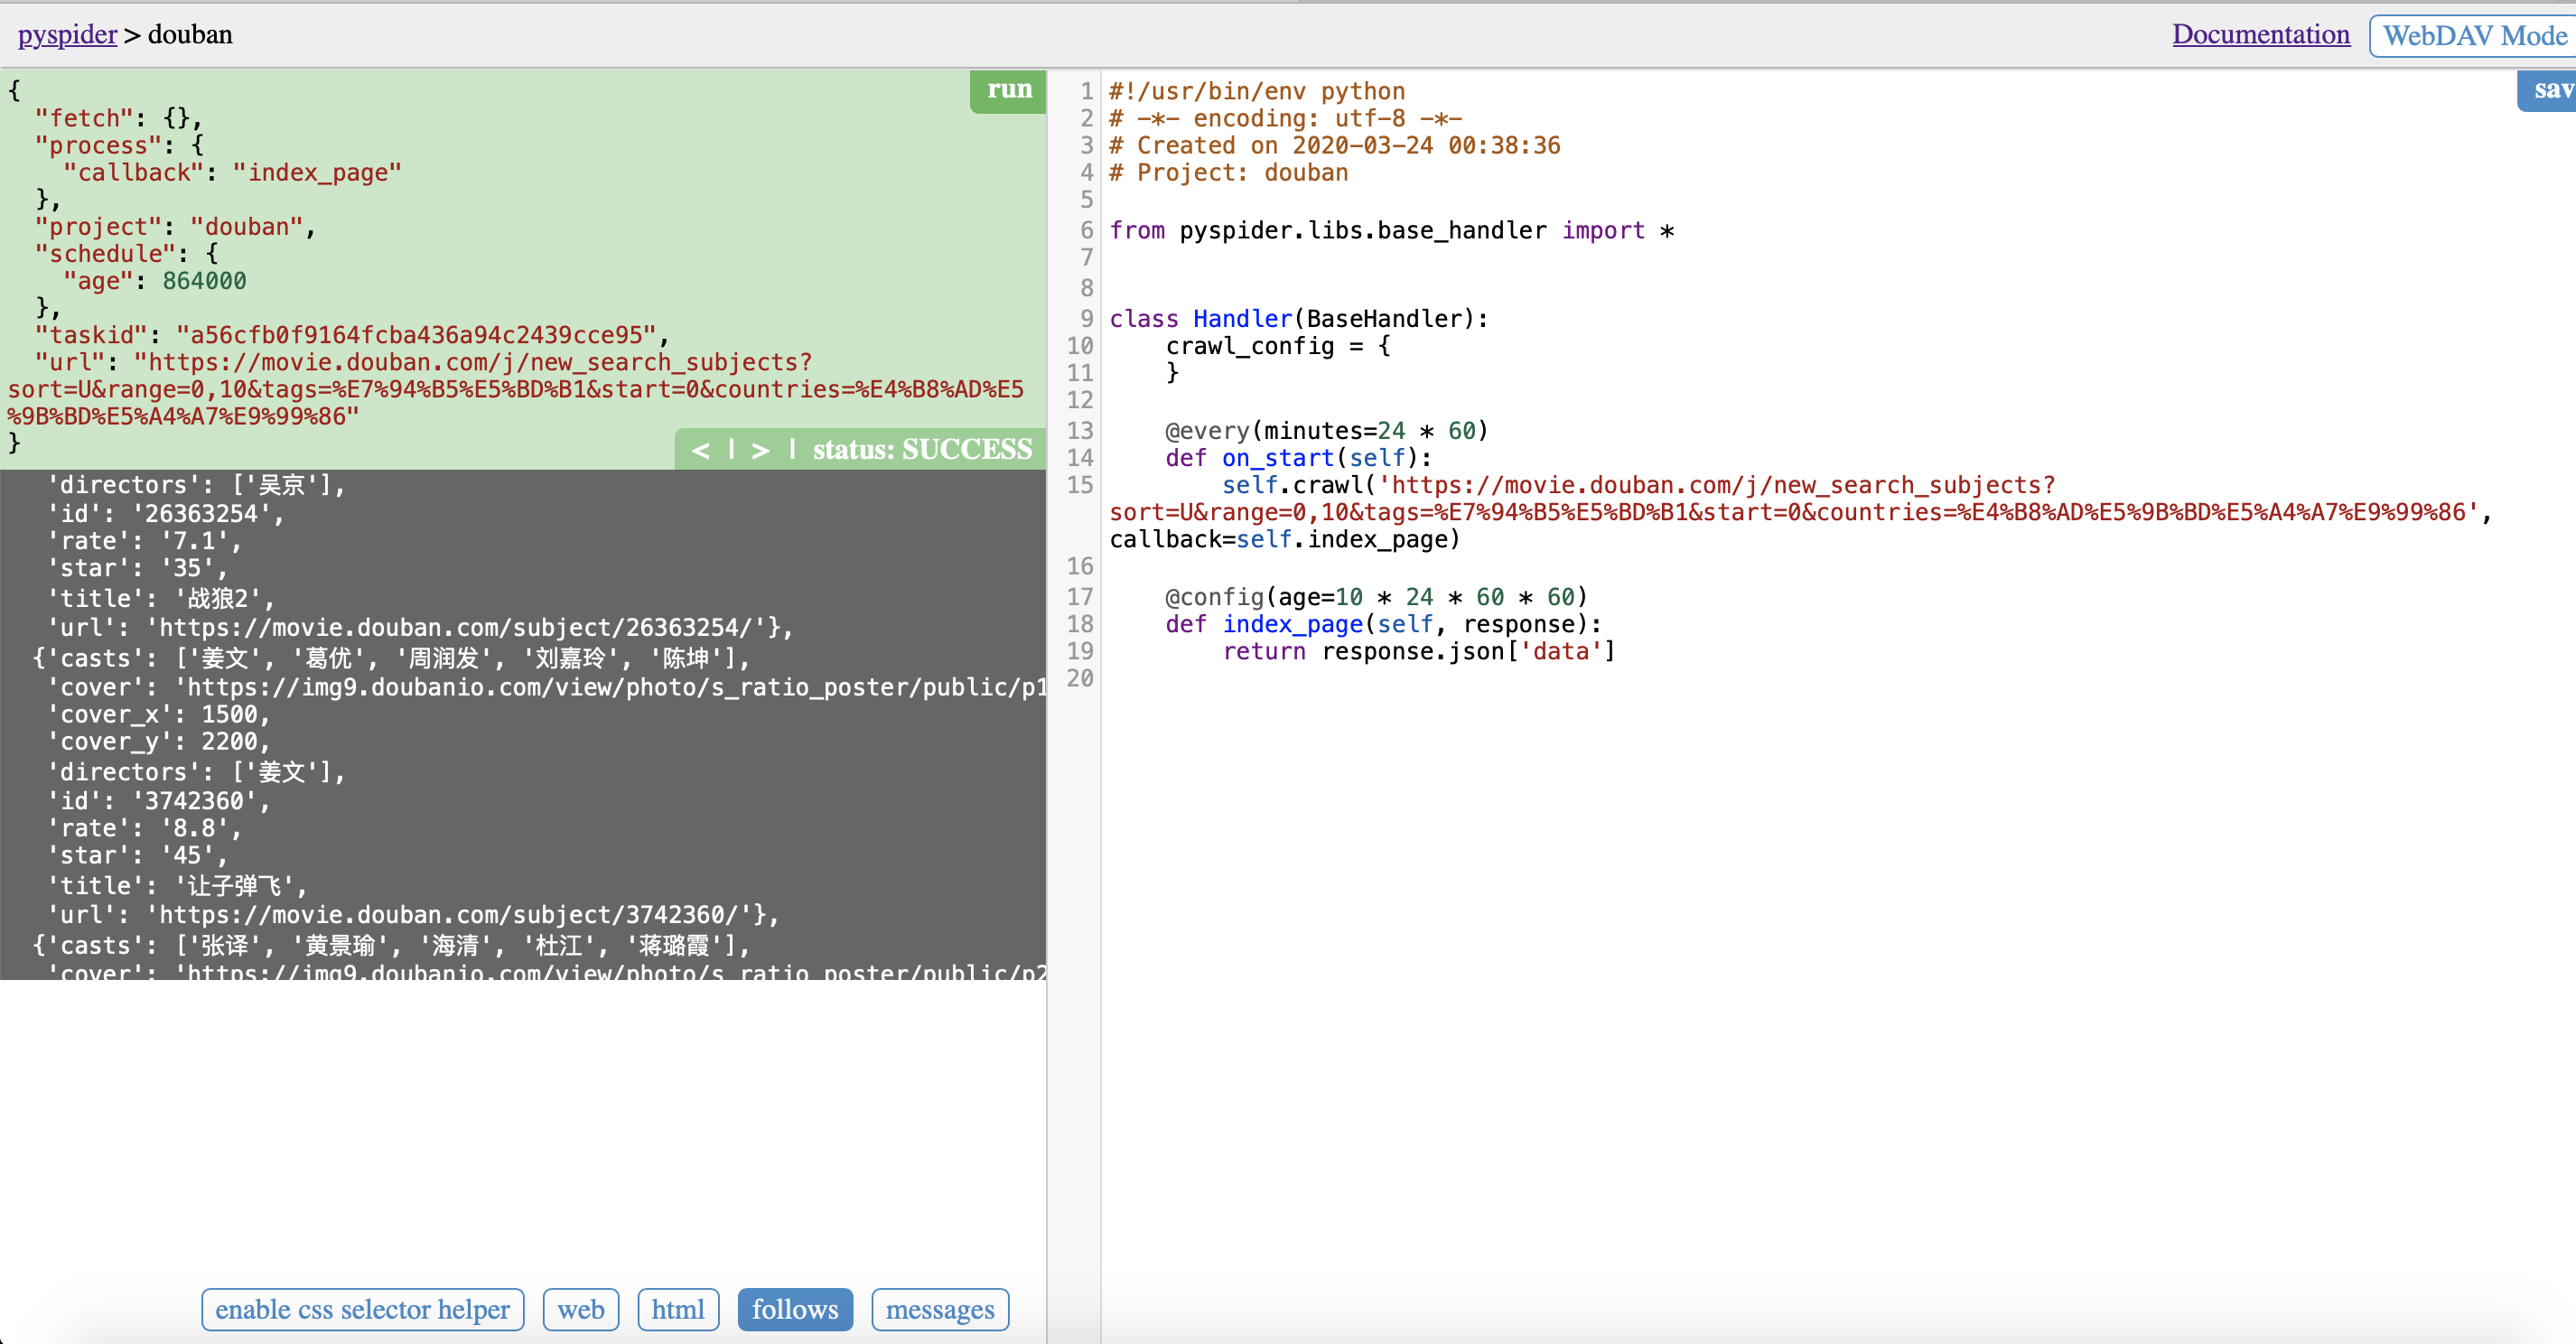

In [5]:
Image('img/10.png')

### 4.2 PhantomJS
Sometimes web page is too complex to find out the API request. It's time to meet the power of PhantomJS. Firstly, you should install it and add it to your path. When Pyspider is connected to your PhantomJS, you can add argument "fetch_type = 'js'" in your self.crawl functin. Then, you would use PhantomJS to grep the messages. For example, we can use the code below to grep the information on  http://movie.douban.com/explore

In [ ]:
class Handler(BaseHandler):
    def on_start(self):
        self.crawl('http://movie.douban.com/explore',
                   fetch_type='js', callback=self.phantomjs_parser)
    
    def phantomjs_parser(self, response):
        return [{
            "rate": x('p strong').text(),
            "url": x.attr.href,
        } for x in response.doc('a.item').items()]

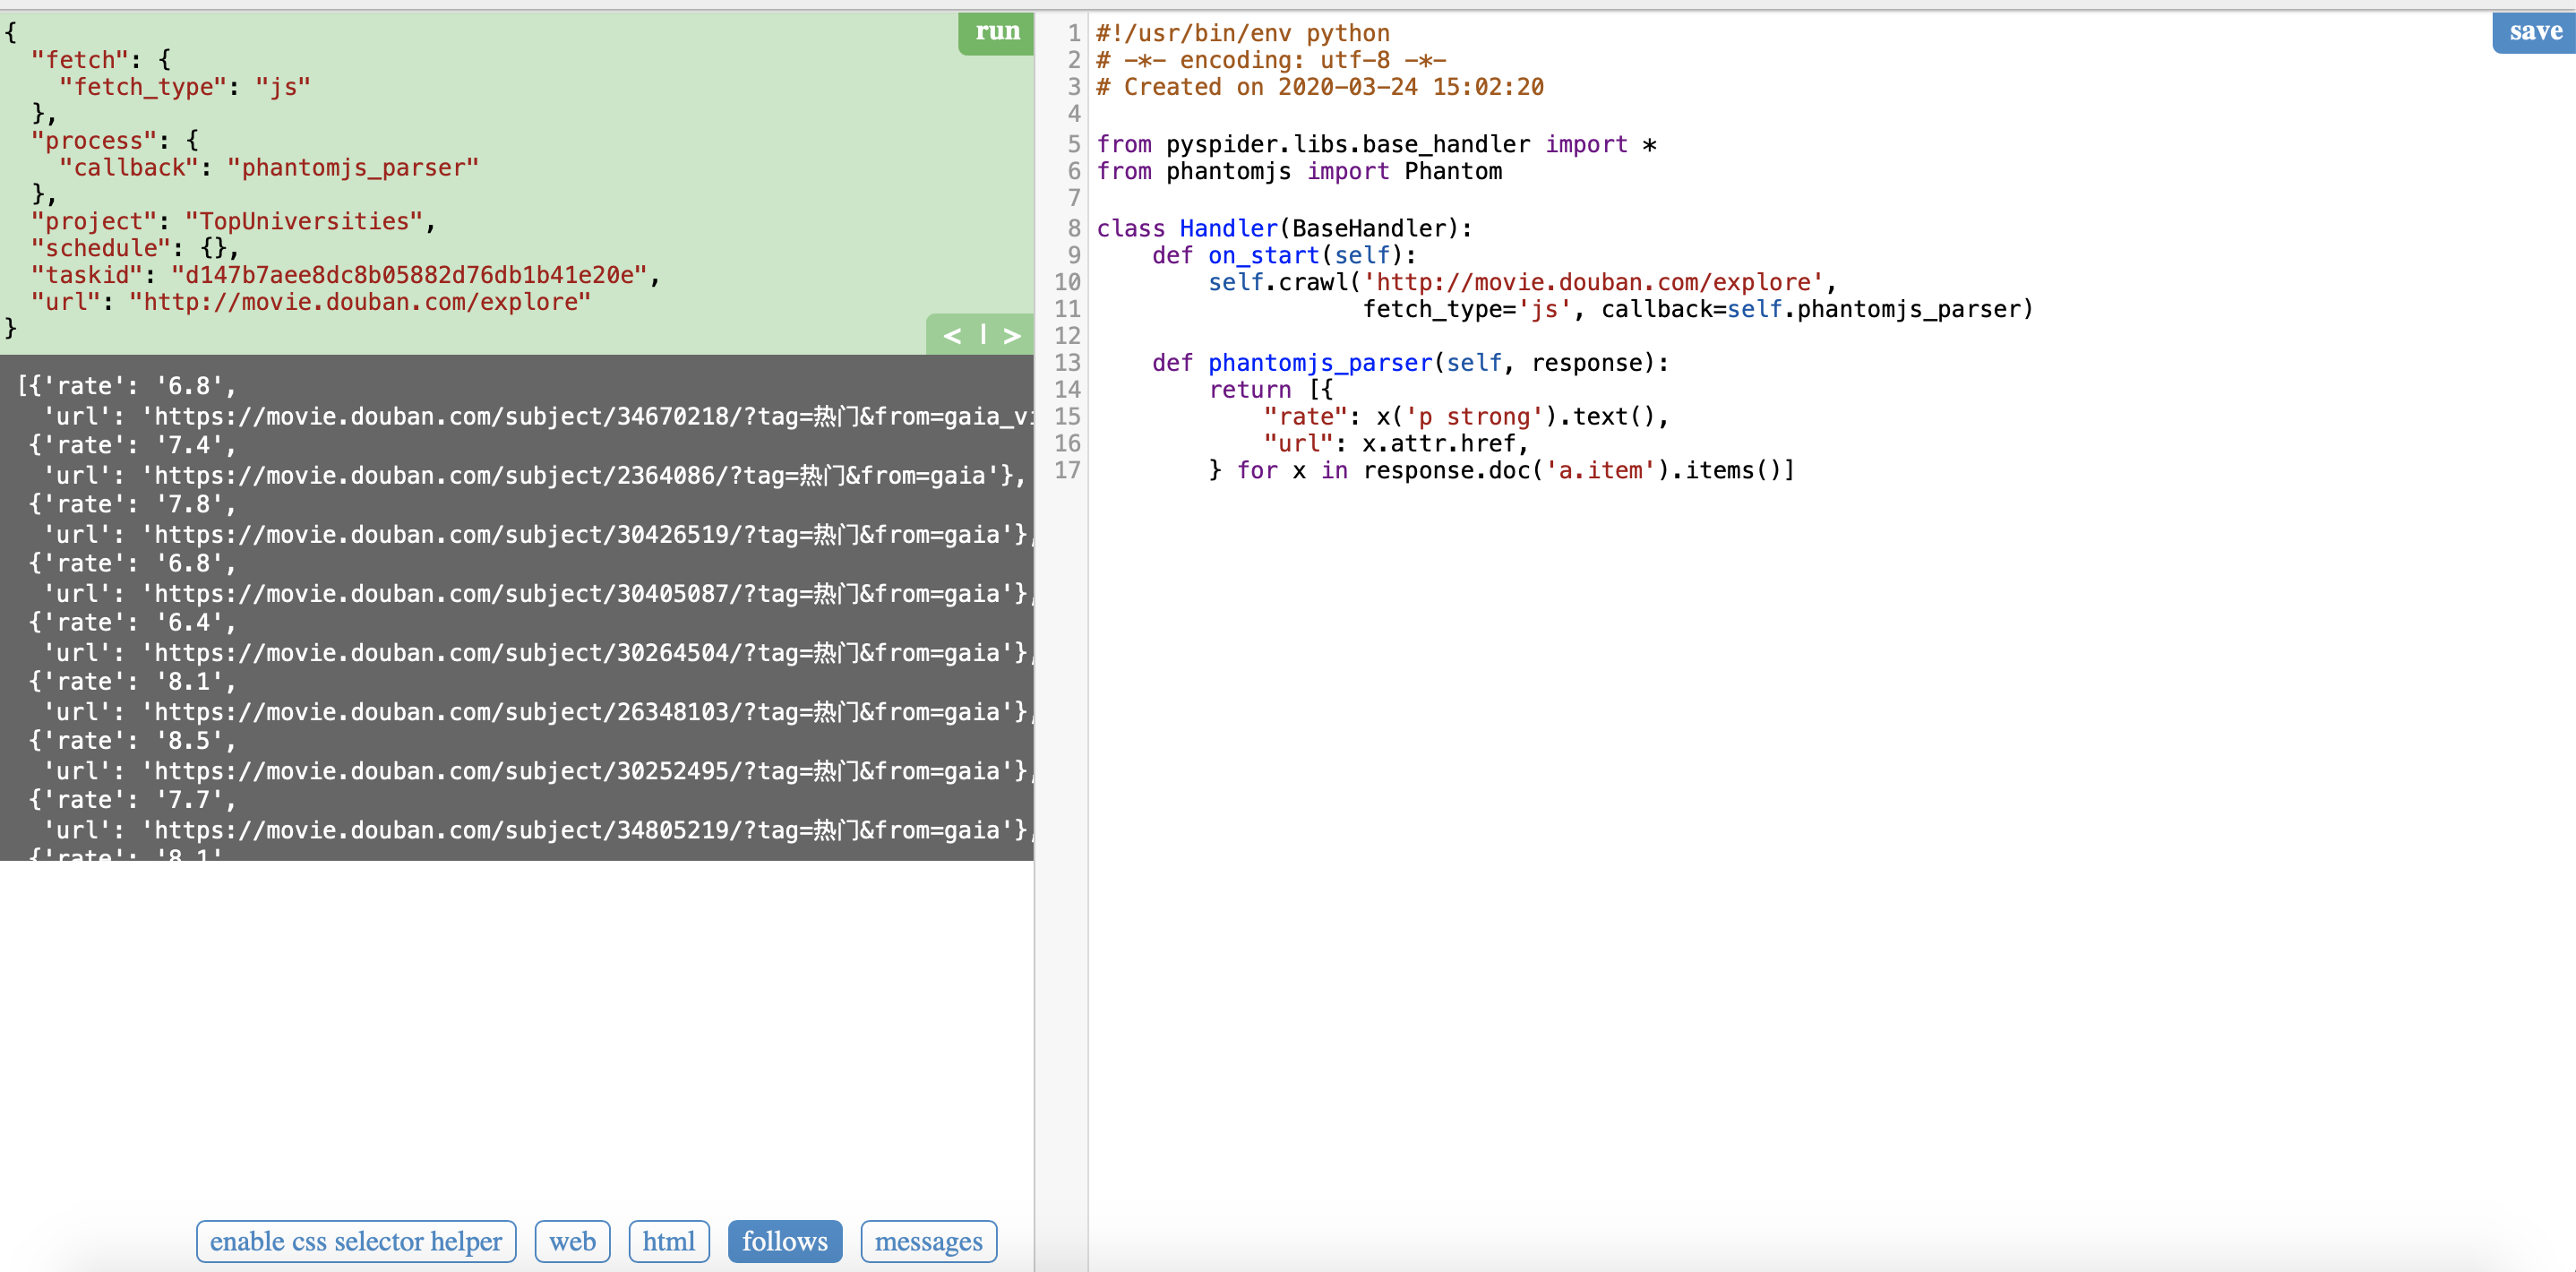

In [8]:
Image('img/11.png')

Sometimes, in your browser, maybe you need to click loading to get more result, we can use js_script argument in self.crawl to run a script on the webpage:

In [ ]:
def on_start(self):
    self.crawl('http://movie.douban.com/explore#more',
               fetch_type='js', js_script="""
               function() {
                 setTimeout("$('.more').click()", 1000);
               }""", callback=self.phantomjs_parser)


# Conclusion
Pyspider is a really useful tool and it can scrape really fast. As we can see from our introduction, the WebUI really facilitate our work of coding and debugging. 

# Reference
https://towardsdatascience.com/pyspider-a-practical-usage-on-competitor-monitoring-metrics-c934d55f9c9a
<br>https://medium.com/@vorathep/pyspider-part-2-3814ee63ca46
<br>https://zhuanlan.zhihu.com/p/51547646
<br>http://docs.pyspider.org/en/latest/